<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Starting-Parameters" data-toc-modified-id="Starting-Parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Starting Parameters</a></span></li><li><span><a href="#Defining-Parameter-Space" data-toc-modified-id="Defining-Parameter-Space-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Defining Parameter Space</a></span></li><li><span><a href="#Simulations" data-toc-modified-id="Simulations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simulations</a></span></li><li><span><a href="#Heatmaps" data-toc-modified-id="Heatmaps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Heatmaps</a></span></li><li><span><a href="#Plot-Best-Curve" data-toc-modified-id="Plot-Best-Curve-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Best Curve</a></span></li><li><span><a href="#Testing-change-in-rho-and-c-with-maintenance-constant-and-exponent-change" data-toc-modified-id="Testing-change-in-rho-and-c-with-maintenance-constant-and-exponent-change-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Testing change in rho and c with maintenance constant and exponent change</a></span><ul class="toc-item"><li><span><a href="#Change-in-Constant" data-toc-modified-id="Change-in-Constant-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Change in Constant</a></span></li><li><span><a href="#Change-in-Metabolic-Exponent" data-toc-modified-id="Change-in-Metabolic-Exponent-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Change in Metabolic Exponent</a></span></li></ul></li><li><span><a href="#Testing-Change-in-rho-and-c-with-Resources-Density" data-toc-modified-id="Testing-Change-in-rho-and-c-with-Resources-Density-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Testing Change in rho and c with Resources Density</a></span></li><li><span><a href="#Testing-3D-vs-2D-at-High-and-Low-Resources" data-toc-modified-id="Testing-3D-vs-2D-at-High-and-Low-Resources-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Testing 3D vs 2D at High and Low Resources</a></span></li><li><span><a href="#Varying-with-Dimensionality" data-toc-modified-id="Varying-with-Dimensionality-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Varying with Dimensionality</a></span><ul class="toc-item"><li><span><a href="#Starting-Mass" data-toc-modified-id="Starting-Mass-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Starting Mass</a></span></li><li><span><a href="#Metabolic-Exponent" data-toc-modified-id="Metabolic-Exponent-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Metabolic Exponent</a></span></li><li><span><a href="#Maturation-Time" data-toc-modified-id="Maturation-Time-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Maturation Time</a></span></li></ul></li><li><span><a href="#Varying-Starting-Mass" data-toc-modified-id="Varying-Starting-Mass-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Varying Starting Mass</a></span></li><li><span><a href="#sanity-check" data-toc-modified-id="sanity-check-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>sanity check</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Sandbox</a></span></li><li><span><a href="#Log-Plots" data-toc-modified-id="Log-Plots-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Log Plots</a></span><ul class="toc-item"><li><span><a href="#barneche-vs-peters" data-toc-modified-id="barneche-vs-peters-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>barneche vs peters</a></span></li></ul></li><li><span><a href="#3D-plots" data-toc-modified-id="3D-plots-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>3D plots</a></span></li></ul></div>

In [1]:
from numpy import isnan, nan_to_num, zeros_like, zeros, array, arange, meshgrid, around, nan
from numpy import where, amax, unravel_index, ravel, linspace
from scipy.integrate import odeint
import seaborn as sb
import matplotlib.pyplot as plt
import Functions as F
import copy
# for in picture in picture graphs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
## for graphs in my darkmode
# sb.set(context='paper',style='whitegrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
sb.set(rc={'figure.facecolor':'white'}, font_scale=1.2)

In [59]:
# figure sizes
a4_sheet = array([8.3, 11.7]) # in inches
a4_width = a4_sheet[0]
a4_heigth = a4_sheet[1]
titlefont = 10
labelfont = 5

start date: 14/07/2020

new attempt at building the optimisation

# Starting Parameters

In [2]:
# Parameters
norm_const_2D = F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 
norm_const_3D = F.Fun_Resp(1, 10**6, "3D")* (60 * 60 * 24)# /s -> /min -> /hour -> /day 

params = {"alpha" : 10, "epsilon" : 0.7, # epsilon from peters book
          "norm_const" : "norm_const", "meta_prop" : 0.25, "meta_exp" : 0.9,
          "c" : 0, "rho" : 0,
          "Xr" : 1, "amp" : 0, "period" : 365, "dimensionality" : "2D"}

if params["dimensionality"] == "2D":
    params["norm_const"] = norm_const_2D
else:
    params["norm_const"] = norm_const_3D



m0 = 10**-2
R0 = 0
time = 100

In [3]:
print(F.Fun_Resp(1, 10**6, "2D")* (60 * 60 * 24))
print(1/(F.hm(1, "2D"))* (60 * 60 * 24))
print(F.am(1, "3D")* (60 * 60 * 24))

9.694238137452219
9.69423944516896
1467.2825157269472


# Defining Parameter Space
Defining the vectors to iterate through for `rho` and `c` values.

In [4]:
# Resolution of parameter space search
resolution = 0.1
# highest value for c and rho, resolution added since `arange` stope before highest value given
param_space_max = 2 #+ resolution 

# c and rho vectors
c_vec = arange(0, 1+resolution, resolution)
rho_vec = arange(0, param_space_max, resolution)
# c and rho arrays
c_array, rho_array = meshgrid(c_vec, rho_vec) # rho changes by row and c by col

# arrays to store results
repro_result_array = zeros_like(c_array) # may have issues if `c` and `rho` arrays are not the same size
mass_result_array = zeros_like(c_array)

# Simulations

In [5]:
# take some key param vals for neatness
alpha = params["alpha"]

for i, rho in enumerate(rho_vec):
    params["rho"] = rho
    
    for j, c in enumerate(c_vec):
        params["c"] = c
        result = F.dmdt_integrate(m0, R0, time, params)
        mass = result[:,0]
        repro = result[:,1]
        
        # check for shrinking
        if mass[-1] < mass[alpha] or mass[0] > mass[-1] or isnan(mass[-1]):
            mass = zeros_like(mass)
            repro = zeros_like(repro)
        
        repro_result_array[i,j] = repro[-1]
        mass_result_array[i,j] = mass[-1]
        

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s


In [6]:
# find max
ind = where(repro_result_array == amax(repro_result_array))
# ind = F.find_max(repro_result_array) #returns first largest value
i, j = ind


In [7]:
ind

(array([2]), array([1]))

# Heatmaps

Text(0.5, 1.0, 'Mass (kg)')

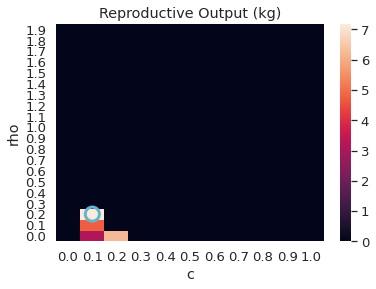

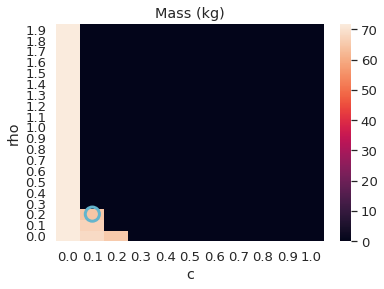

In [8]:
plt.figure()
sb.heatmap(repro_result_array,
            xticklabels = around(c_vec, decimals=2), 
            yticklabels= around(rho_vec, decimals=2)).invert_yaxis()
#scale circle for highest value with resolution of heatmap
offset = resolution *5
size = resolution * 2000
# circle highest value
plt.scatter(j+offset, i+offset, s=size, linewidth=3, facecolors='none', edgecolors='c' )

plt.ylabel("rho")
plt.xlabel("c")
plt.title("Reproductive Output (kg)")

plt.figure()
sb.heatmap(mass_result_array,
            xticklabels = around(c_vec, decimals=2), 
            yticklabels = around(rho_vec, decimals=2)).invert_yaxis()

# circle highest value
plt.scatter(j+offset, i+offset, s=size, linewidth=3, facecolors='none', edgecolors='c' )

plt.ylabel("rho")
plt.xlabel("c")
plt.title("Mass (kg)")

In [9]:
# debugging for multiple best values
# c_opt = 1.4
# rho_opt = 0.8

repro_result_array[ind]

array([7.18538083])

In [10]:
rho_opt = float(rho_vec[i])
c_opt = float(c_vec[j])
print("c_opt:", c_opt)
print("rho_opt:",rho_opt)
print("highest reproductive output:", repro_result_array[ind])
print("mass output for optimum reproduction:", mass_result_array[ind])

c_opt: 0.1
rho_opt: 0.2
highest reproductive output: [7.18538083]
mass output for optimum reproduction: [64.53126538]


# Plot Best Curve

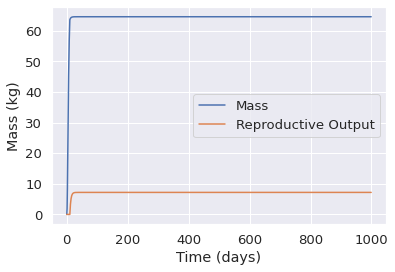

In [11]:
params["c"] = c_opt
params["rho"] =rho_opt

time=1000

mR = F.dmdt_integrate(m0, R0, time, params) 

# unpack results
m = mR[:,0]
repro = mR[:,1]

t = arange(0, time, 1)

plt.figure()
plt.plot(t, m, label="Mass") #change dimensions from col to row
plt.plot(t, repro, label="Reproductive Output") 
plt.xlabel("Time (days)")
plt.ylabel("Mass (kg)")

plt.legend()
plt.show()

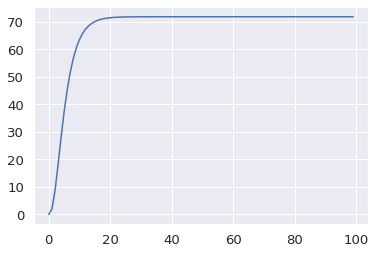

In [12]:
mR0 = [m0, R0]
t = arange(0, 100, 1)

alpha = params["alpha"]
epsilon = params["epsilon"]
norm_const = params["norm_const"]
meta_prop = params["meta_prop"]
meta_exp = params["meta_exp"]
c = 0#params["c"]
rho = 0#params["rho"]
Xr = params["Xr"]
amp = 0.99#params["amp"]
period = params["period"]
dimensionality = params["dimensionality"]

args = (alpha, epsilon, norm_const, meta_prop, meta_exp, c, rho, Xr, amp, period, dimensionality)
mR = odeint(F.dmdt, mR0, t, args=args)
plt.plot(t, mR[:,0])

[0.01, 0]


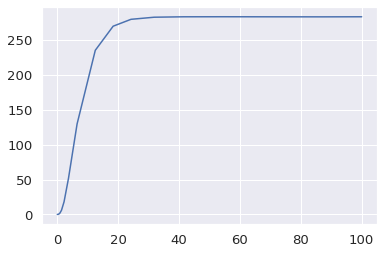

In [13]:
# testing another integrater
from scipy.integrate import solve_ivp
mR0 = [m0, R0]
print(mR0)
ivp = solve_ivp(F.dmdt_test, (0, 100), mR0, args=args)
plt.plot(ivp["t"], ivp["y"][0])
# plt.plot(arange(0,1000), ivp["sol"][0])

# Testing change in rho and c with maintenance constant and exponent change

## Change in Constant

In [14]:
# parameter reset
temp_params = copy.deepcopy(params)

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scal

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scal

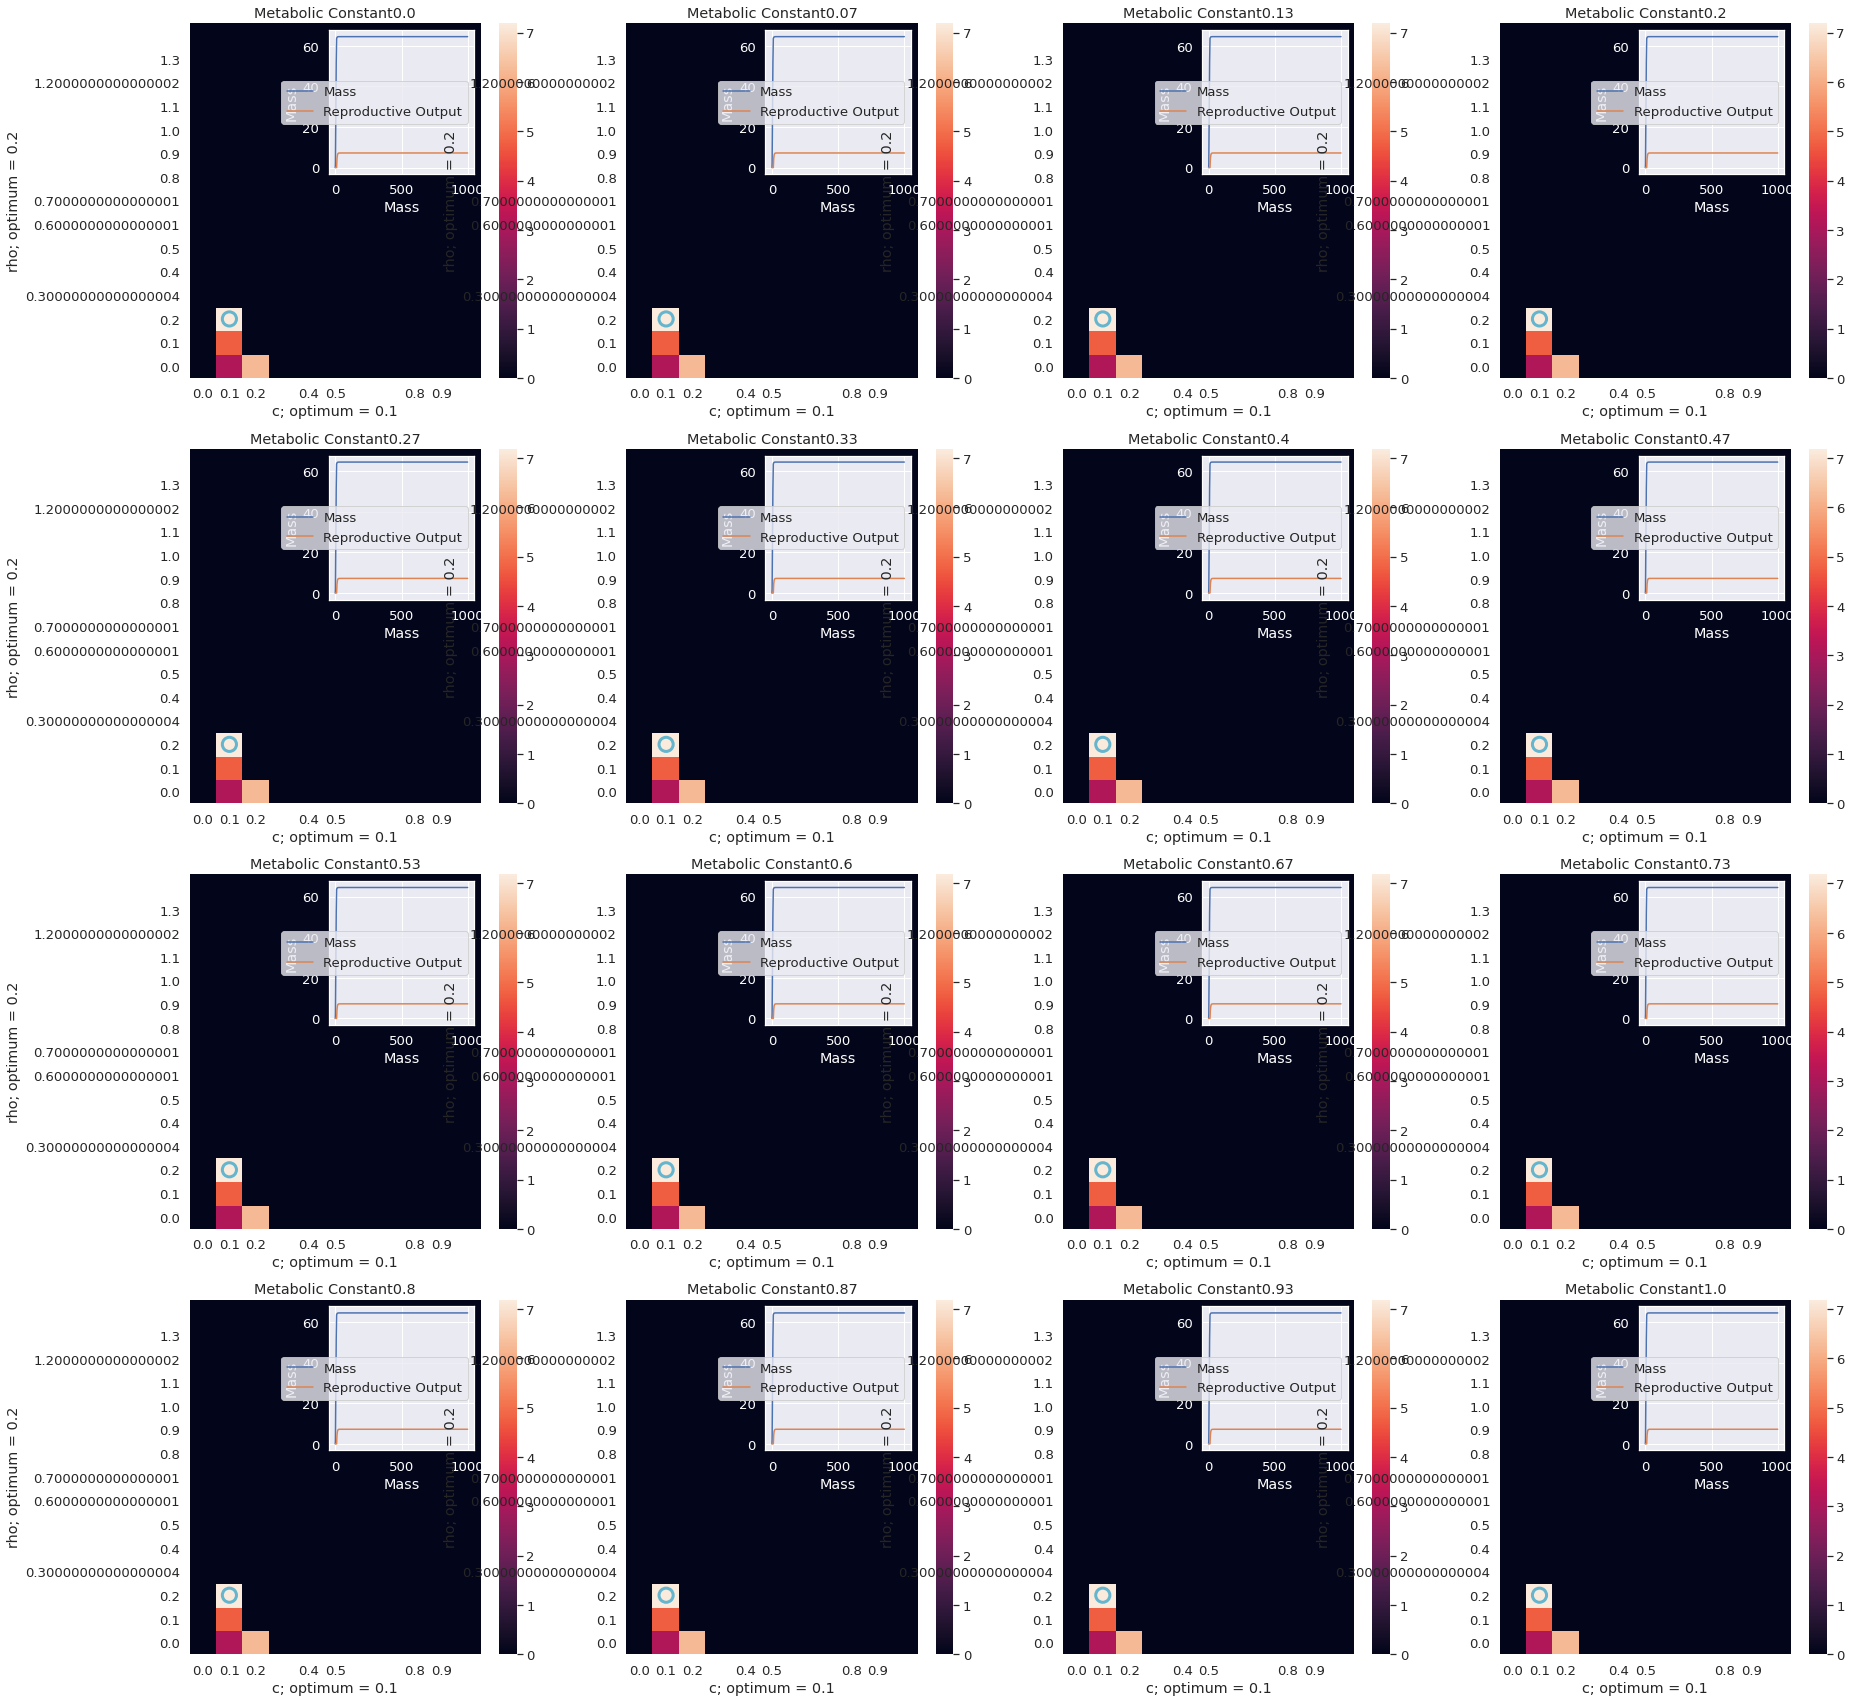

In [15]:
# Resolution of parameter space search
resolution = 0.1
# highest value for c and rho, resolution added since `arange` stope before highest value given
param_space_max = 1.5 #+ resolution 

# c and rho vectors
c_vec = arange(0, 1+resolution, resolution)
rho_vec = arange(0, param_space_max, resolution)

proportions = around(linspace(0, 1, 16), decimals=2)

plt.figure(figsize=(30,30))
for i, meta_prop in enumerate(proportions, 1):
    temp_params["meta_prop"] = meta_prop
    ax = plt.subplot(4,4,i)
    res = F.plot_optimum(c_vec, rho_vec, m0, R0, time, temp_params)
    if len(res[0]) == 1:
        c = float(res[0])
        rho = float(res[1])
    else:
        c = 0
        rho = 0
    plt.xlabel("c; optimum = " +str(c))
    plt.ylabel("rho; optimum = " + str(rho))
    plt.title("Metabolic Constant" + str(meta_prop))
    
    # growth plot
    growth_plot = inset_axes(ax, width="50%", height=2, loc="upper right")
    temp_params["c"] = c
    temp_params["rho"] = rho
    F.plot_supply(m0, R0, time, temp_params)    
    plt.xticks(color="w")
    plt.xlabel("Mass", color="w")
    plt.yticks(color="w")
    plt.ylabel("Mass", color="w")
    
plt.savefig("../results/varying_meta_const_optima.pdf")

## Change in Metabolic Exponent

In [16]:
# parameter reset
temp_params = copy.deepcopy(params)

In [17]:
time = 10**4
temp_params["alpha"] = 365*5
temp_params["dimensionality"] = "3D"

/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:215: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:240: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/do

/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:215: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:240: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/do

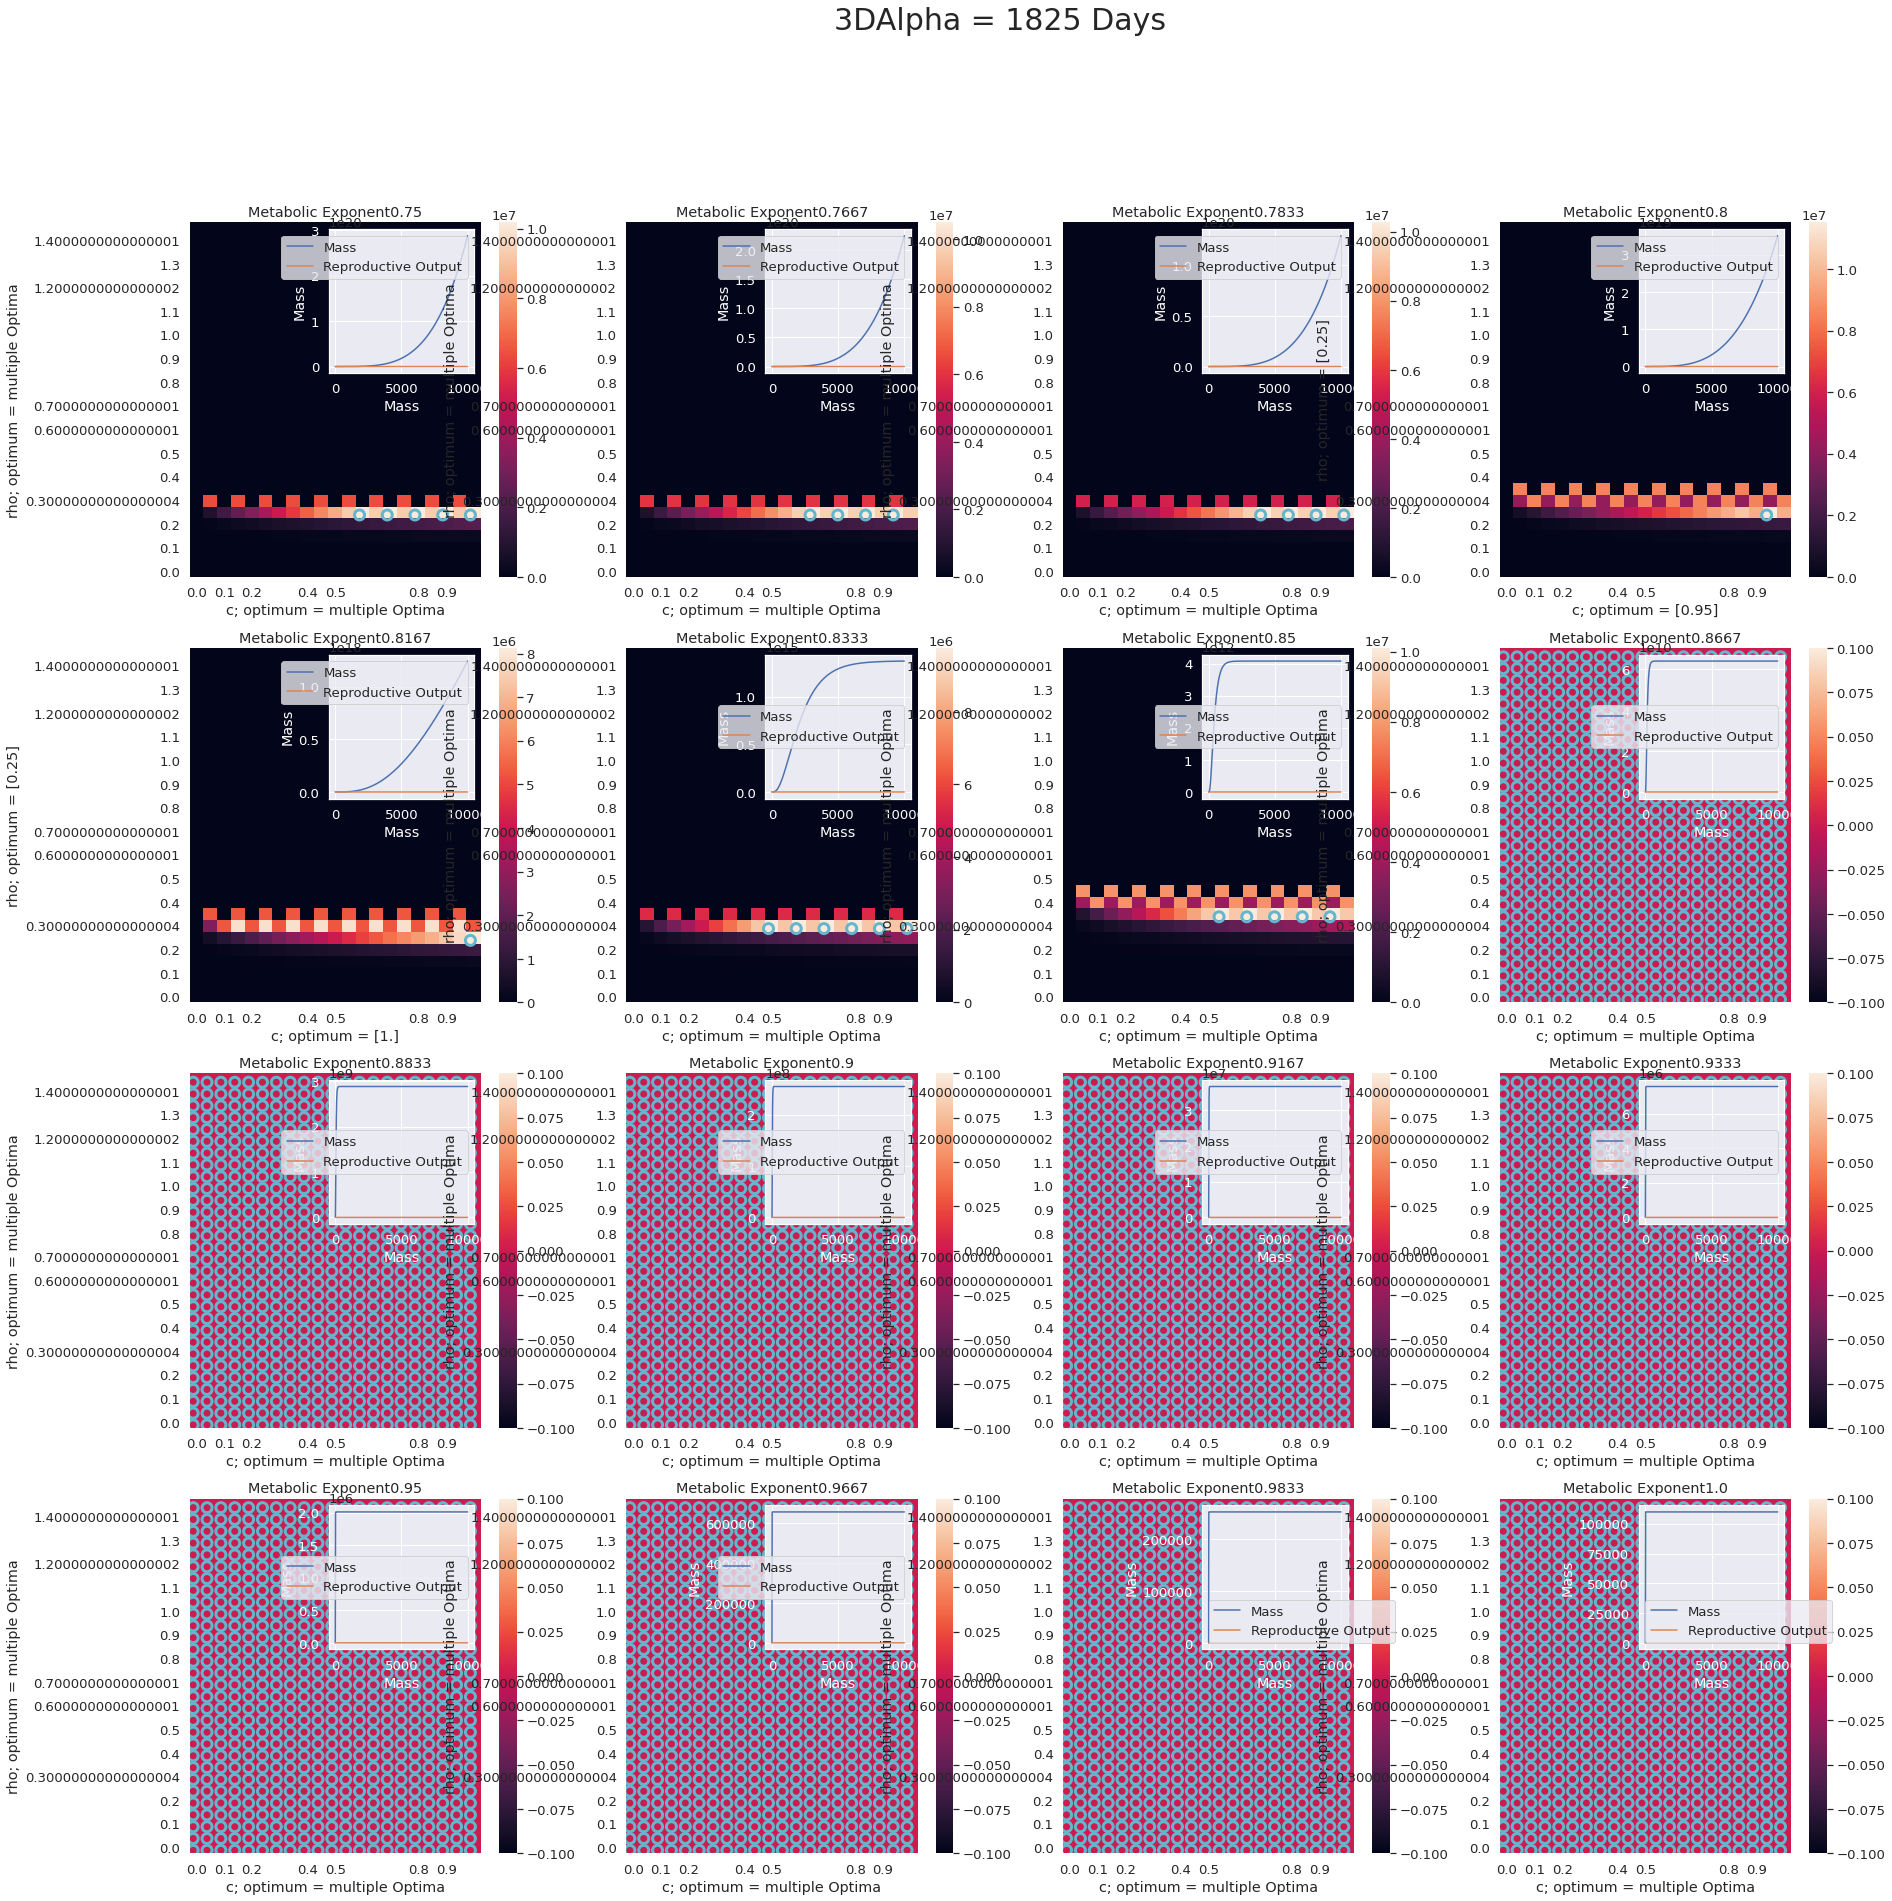

In [18]:

# Resolution of parameter space search
resolution = 0.05
# highest value for c and rho, resolution added since `arange` stope before highest value given
param_space_max = 1.5 #+ resolution 

# c and rho vectors
c_vec = around(arange(0, 1+resolution, resolution), decimals=4)
rho_vec = around(arange(0, param_space_max, resolution), decimals=4)

exponents = around(linspace(0.75, 1, 16), decimals=4)

plt.figure(figsize=(30,30))
plt.suptitle(str(temp_params["dimensionality"]) + "Alpha = " +  str(temp_params["alpha"]) +  " Days", fontsize= 30)
for i, meta_exp in enumerate(exponents, 1):
    temp_params["meta_exp"] = meta_exp
    ax = plt.subplot(4,4,i)
    c, rho = F.plot_optimum(c_vec, rho_vec, m0, R0, time, temp_params)
    if len(c) == 1:
        c_label = c
        rho_label = rho
        # for plot_supply since it doesnt handle arrays
        c = float(c)
        rho = float(rho)
    else:
        c_label = "multiple Optima"
        rho_label = "multiple Optima"
        c = 0 
        rho = 0
    plt.xlabel("c; optimum = " +str(c_label))
    plt.ylabel("rho; optimum = " + str(rho_label))
    plt.title("Metabolic Exponent" + str(meta_exp))
    
    
    # growth subsub-plot
    growth_plot = inset_axes(ax, width="50%", height=2, loc="upper right")
    temp_params["c"] = c
    temp_params["rho"] = rho
    F.plot_supply(m0, R0, time, temp_params)
    plt.xticks(color="w")
    plt.xlabel("Mass", color="w")
    plt.yticks(color="w")
    plt.ylabel("Mass", color="w")
plt.savefig("../results/varying_meta_exp_optima.pdf")

In [19]:
# reset time again
time = 1000
temp_params["alpha"] = 10

# Testing Change in rho and c with Resources Density

In [20]:
# parameter reset
temp_params = copy.deepcopy(params)

/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (

/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scal

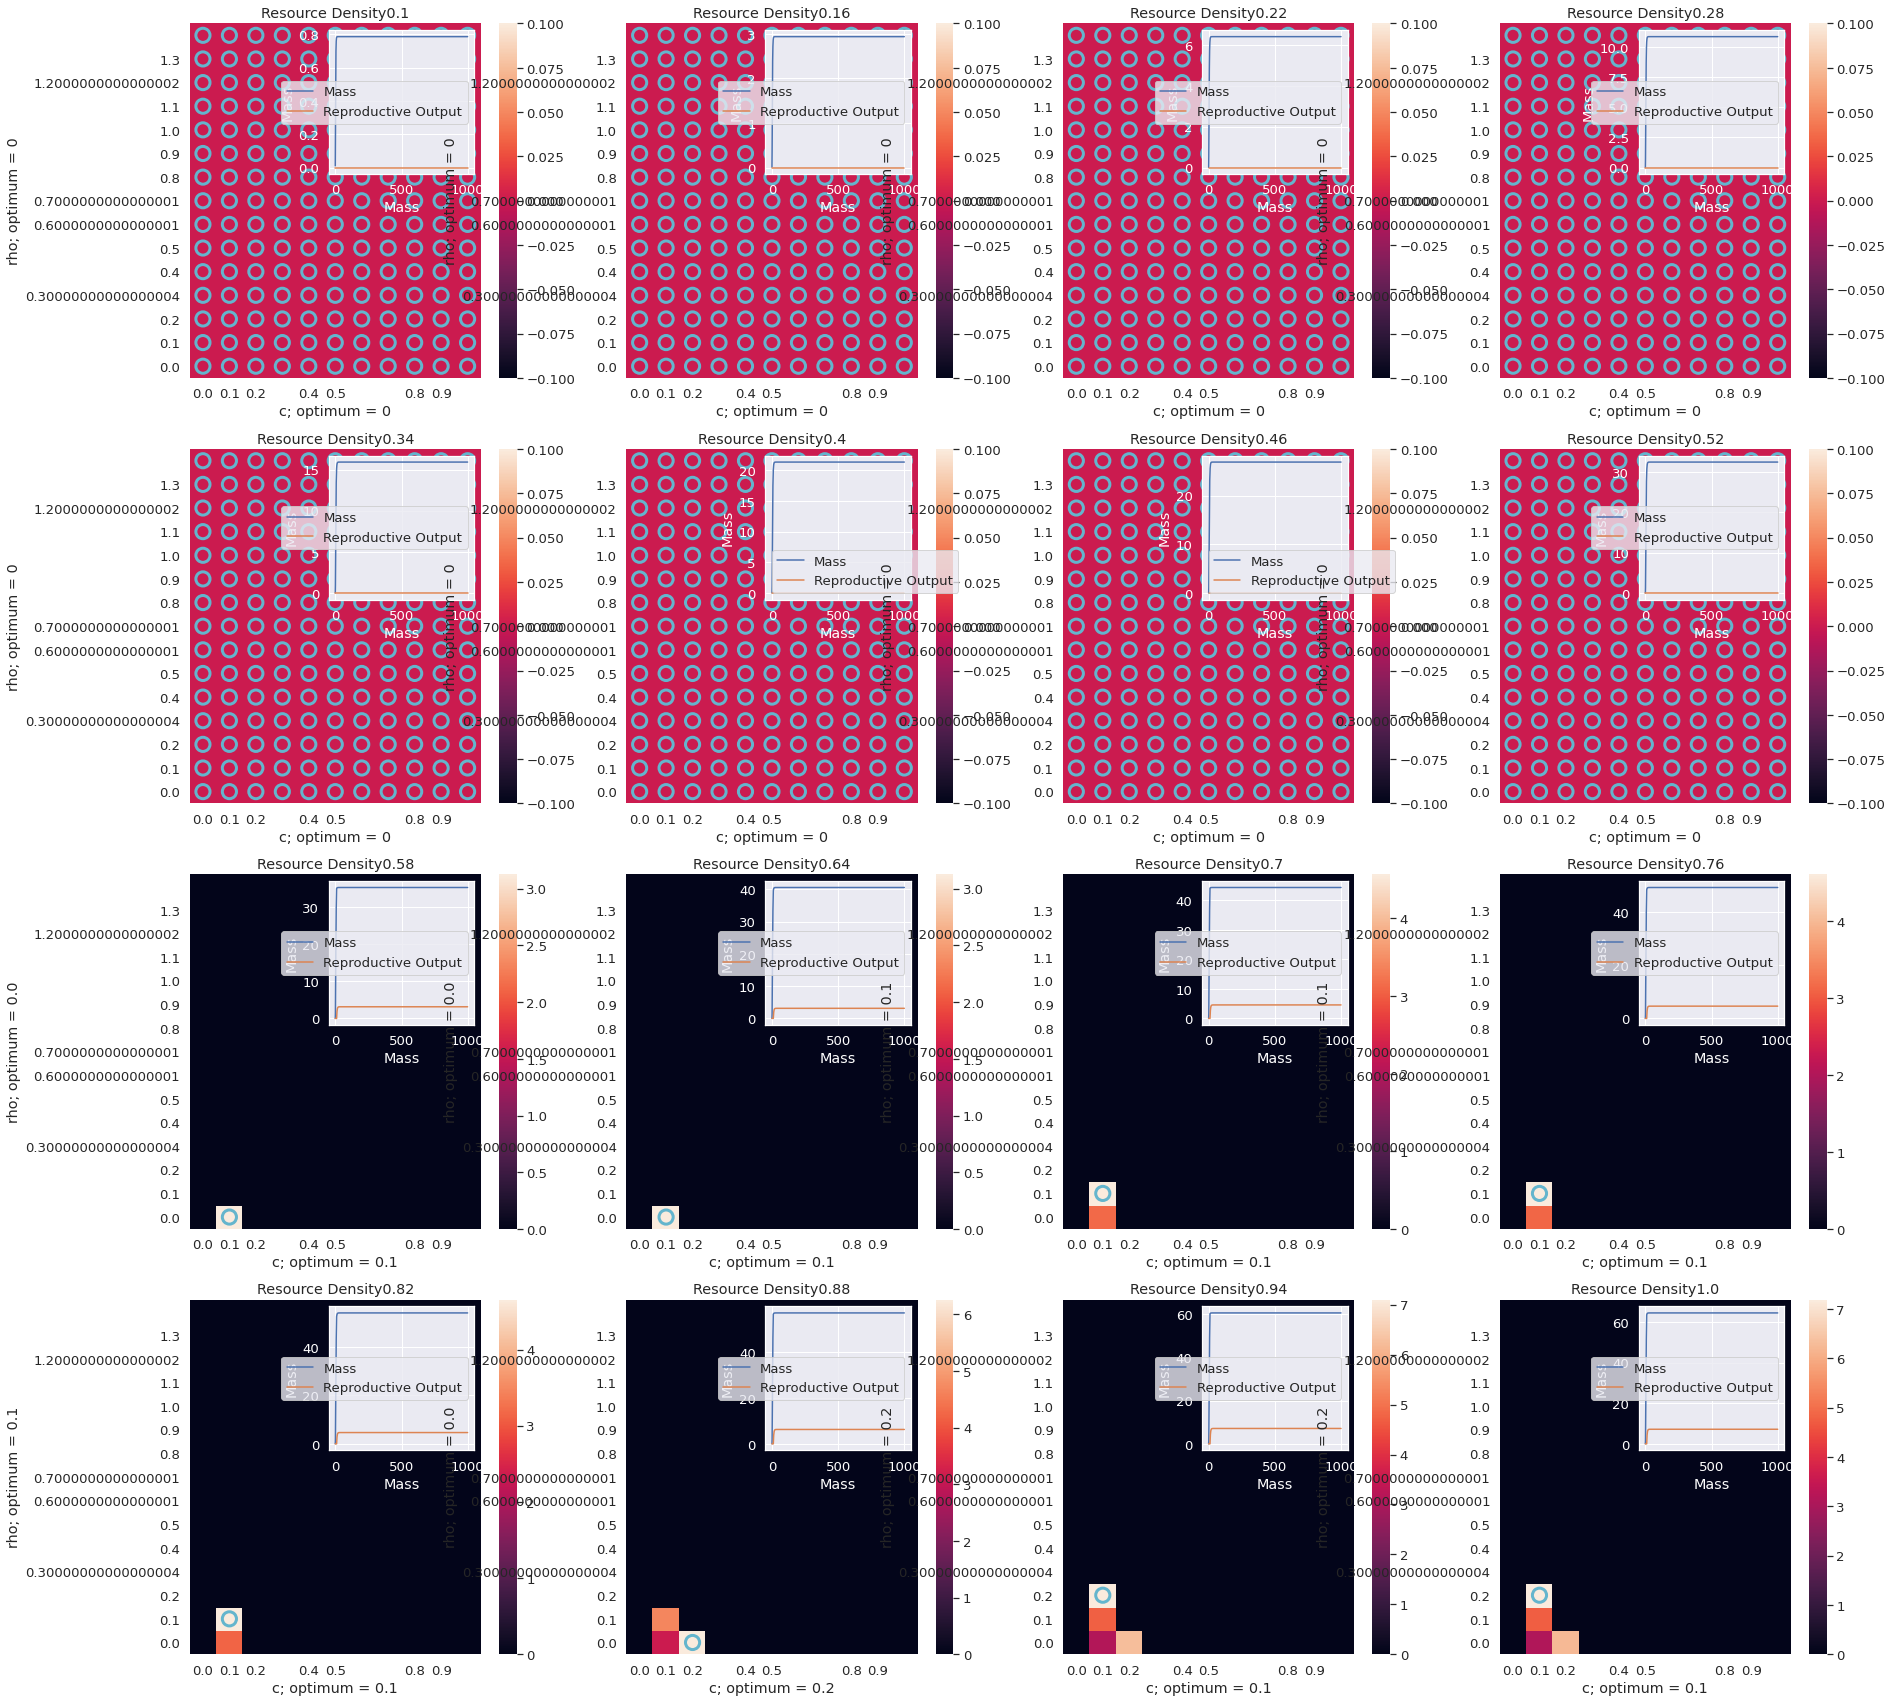

In [21]:
# Resolution of parameter space search
resolution = 0.1
# highest value for c and rho, resolution added since `arange` stope before highest value given
param_space_max = 1.5 #+ resolution 

# c and rho vectors
c_vec = arange(0, 1+resolution, resolution)
rho_vec = arange(0, param_space_max, resolution)

resources = around(linspace(0.1, 1, 16), decimals=4)

plt.figure(figsize=(30,30))
for i, Xr in enumerate(resources, 1):
    temp_params["Xr"] = Xr
    ax = plt.subplot(4,4,i)
    res = F.plot_optimum(c_vec, rho_vec, m0, R0, time, temp_params)
    if len(res[0]) == 1:
        c = float(res[0])
        rho = float(res[1])
    else:
        c = 0
        rho = 0
    plt.xlabel("c; optimum = " +str(c))
    plt.ylabel("rho; optimum = " + str(rho))
    plt.title("Resource Density" + str(Xr))
    
    growth_plot = inset_axes(ax, width="50%", height=2, loc="upper right")
    temp_params["c"] = c
    temp_params["rho"] = rho
    F.plot_supply(m0, R0, time, temp_params)
    plt.xticks(color="w")
    plt.xlabel("Mass", color="w")
    plt.yticks(color="w")
    plt.ylabel("Mass", color="w")
plt.savefig("../results/varying_res_optima.pdf")

# Testing 3D vs 2D at High and Low Resources

In [60]:
# parameter reset
temp_params = copy.deepcopy(params)

In [61]:
# resource parameters, all in kg/m^2
#low resources
low_res = 0.25
high_res = 100

/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0


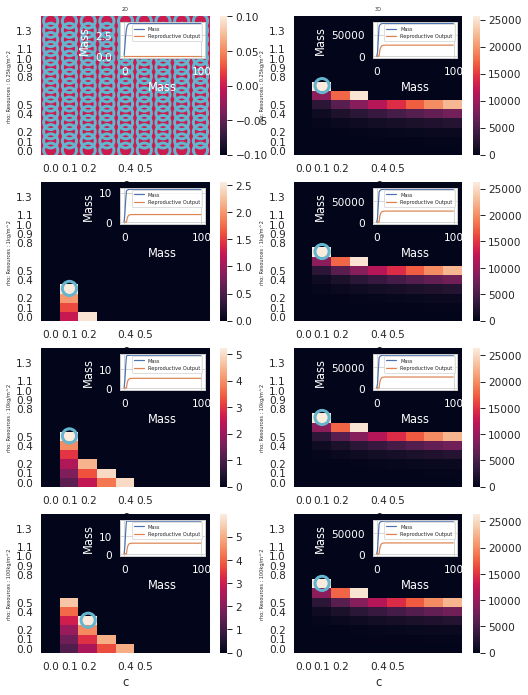

In [64]:
dimensions = ["2D", "3D"]
resources = [low_res, 1, 10, high_res] # low, mid low, mid high, high

# c, rho vectors
resolution = 0.1 # resolution of parameter scan
c_vec = around(arange(0, 0.8+resolution, resolution), decimals=4)
rho_vec = around(arange(0, 1.5, resolution), decimals=4)

plt.figure(figsize=(a4_sheet))
ticker = 0 # for subplot location assignment
# Xr_label = ["Low Resources", "Mid-Low", "Mid-High", "High Resources"]
for i, Xr in enumerate(resources):
    temp_params["Xr"] = Xr
    for dim in dimensions:
        ticker = ticker + 1 # tick
        temp_params["dimensionality"] = dim
        #adjust norm_const
        if temp_params["dimensionality"] == "2D":
            temp_params["norm_const"] = norm_const_2D
        else:
            temp_params["norm_const"] = norm_const_3D
        #plot
        ax = plt.subplot(len(resources), 2, ticker)
        c, rho = F.plot_optimum(c_vec, rho_vec, m0, R0, time, temp_params)
        if ticker <= 2:
            plt.title(dim, fontsize=labelfont)
        else:
            plt.title("")
        plt.ylabel("rho; " + "Resources" + " : " + str(Xr) + "kg/m^2", fontsize=labelfont)
        
        if len(c) == 1:
            c = float(c)
            rho = float(rho)
        else:
            c=0
            rho=0

        growth_plot = inset_axes(ax, width="50%", height=0.5, loc="upper right")
        temp_params["c"] = c
        temp_params["rho"] = rho
        F.plot_supply(m0, R0, time, temp_params)
        plt.xticks(color="w")
        plt.xlabel("Mass", color="w")
        plt.yticks(color="w")
        plt.ylabel("Mass", color="w")
        plt.legend(fontsize=labelfont)
plt.savefig("../results/HighLow_3D2D.pdf")
        
        
        

# Varying with Dimensionality

## Starting Mass

In [25]:
# parameter reset
temp_params = copy.deepcopy(params)
temp_params

{'alpha': 10,
 'epsilon': 0.7,
 'norm_const': 9.694238137452219,
 'meta_prop': 0.25,
 'meta_exp': 0.9,
 'c': 0.1,
 'rho': 0.2,
 'Xr': 1,
 'amp': 0,
 'period': 365,
 'dimensionality': '2D'}

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/do

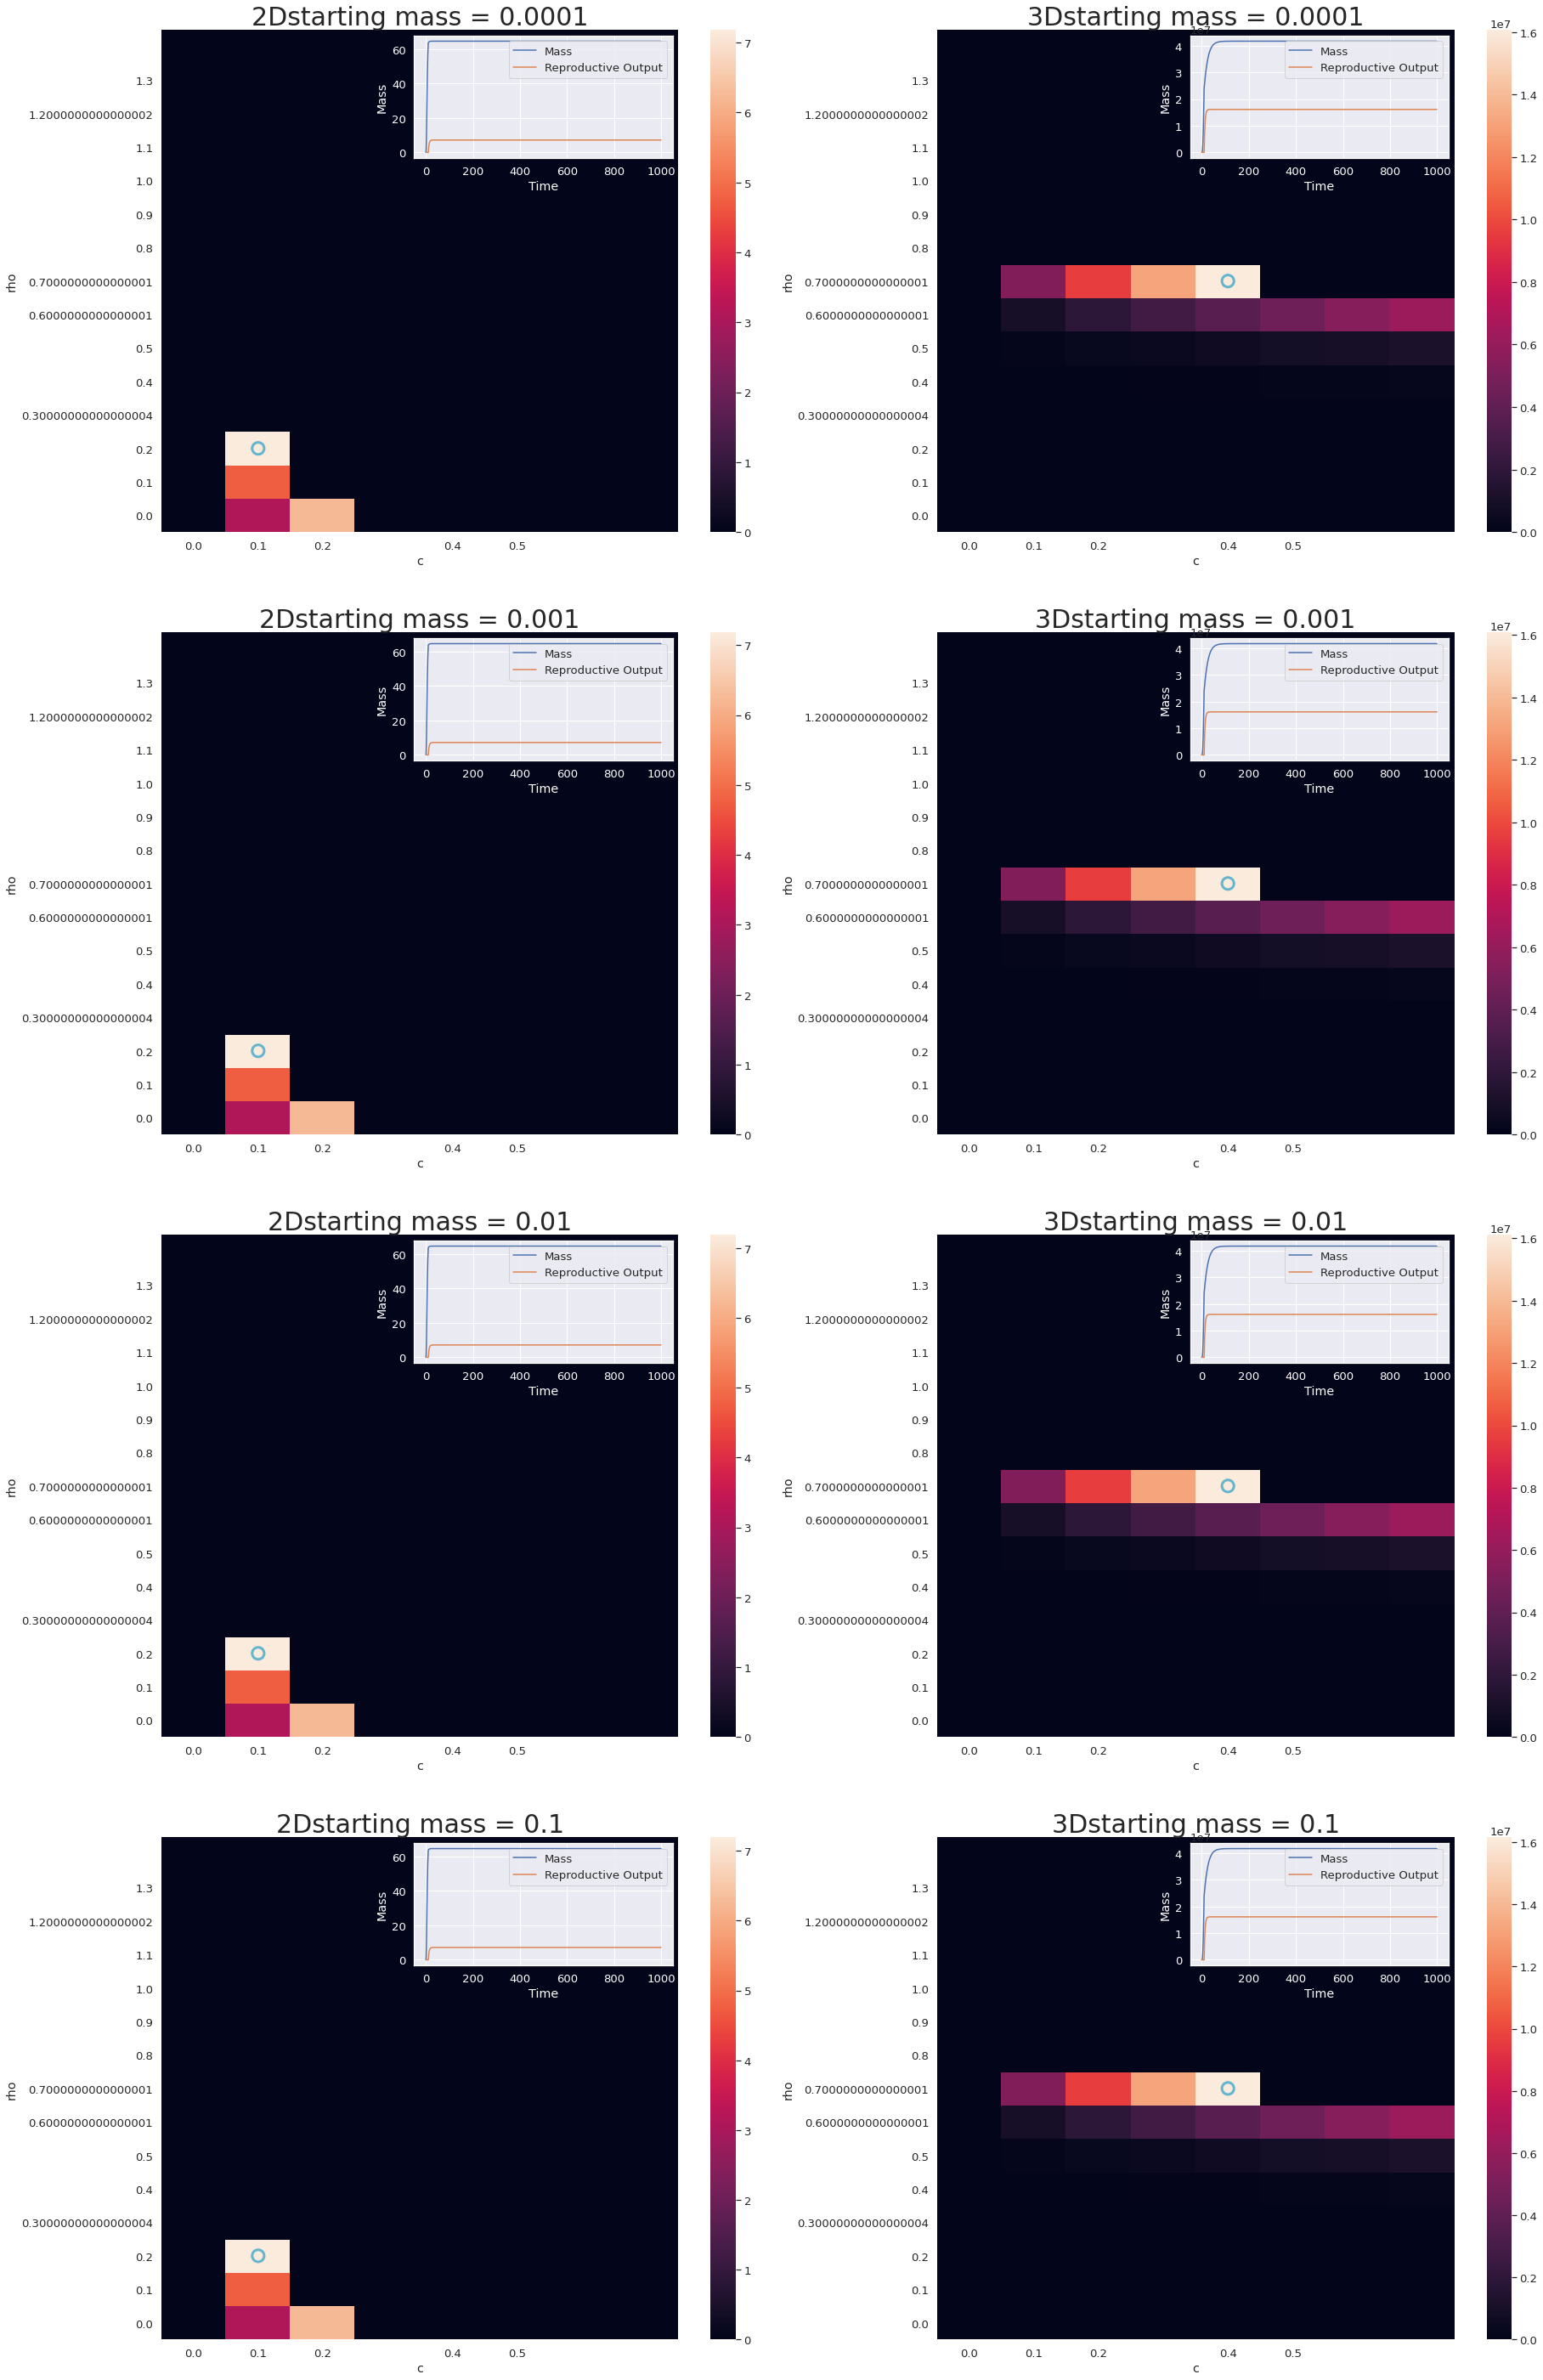

In [26]:
# 
starting_masses = [10**-4, 10**-3, 10**-2, 10**-1]

# c, rho vectors
resolution = 0.1 # resolution of parameter scan
c_vec = arange(0, 0.7+resolution, resolution)
rho_vec = arange(0, 1.5, resolution)

# store rho and c results
dict_2D ={}
dict_3D ={}

dimensions = ["2D", "3D"]
ticker = 0
plt.figure(figsize=(30,50))
for m0_temp in starting_masses:
    for dim in dimensions:
        ticker= ticker +1
        temp_params["dimensionality"] = dim
        #change norm_const for dim
        if dim == "2D":
            temp_params["norm_const"] = norm_const_2D
        else:
            temp_params["norm_const"] = norm_const_3D
        #plot
        ax = plt.subplot(len(starting_masses), 2, ticker)
        c, rho = F.plot_optimum(c_vec, rho_vec, m0_temp, R0, time, temp_params)
        if dim == "2D":
            dict_2D[str(m0_temp)] = [c, rho]
        else:
            dict_3D[str(m0_temp)] = [c, rho]
        plt.title(dim + "starting mass = " + str(m0_temp), fontsize=30)
        
    # subsub-plots in top right
        if len(c) == 1:
            c = float(c)
            rho = float(rho)
        else:
            c=0
            rho=0

        growth_plot = inset_axes(ax, width="50%", height=2, loc="upper right")
        temp_params["c"] = c
        temp_params["rho"] = rho
        F.plot_supply(m0, R0, time, temp_params)
        plt.xticks(color="w")
        plt.xlabel("Time", color="w")
        plt.yticks(color="w")
        plt.ylabel("Mass", color="w")
plt.savefig("../results/starting_mass_3D2D.pdf")

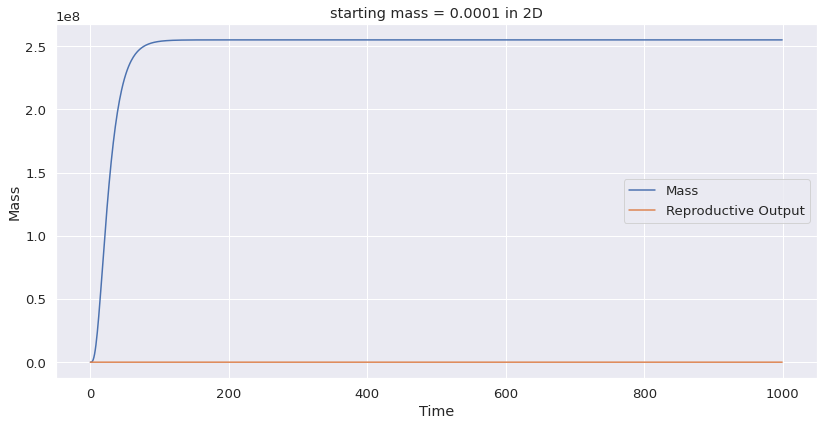

In [27]:
plt.figure(figsize=(30,30))

time  = 1000
for dim in dimensions:    
    if dim == "2D":
        ticker = 0
        temp_params["norm_const"] = norm_const_2D
        for m0_temp in dict_2D.keys():
            ticker = ticker +1
            c, rho = dict_2D[m0_temp]
            plt.subplot(len(starting_masses), 2, ticker)
            try:
                temp_params["c"] = float(c)
                temp_params["rho"] = float(rho)
                result = F.plot_supply(float(m0_temp), R0, time, temp_params)
            except TypeError:
                plt.text(0.5,0.5,"Multiple Values Found", fontsize=30)
            plt.title("starting mass = " + str(m0_temp) + " in "+ dim)
            break
    break
    if dim == "3D":
        ticker = len(starting_masses)
        temp_params["norm_const"] = norm_const_3D
        for m0_temp in dict_3D.keys():
            ticker = ticker +1
            c, rho = dict_3D[m0_temp]
            plt.subplot(len(starting_masses), 2, ticker)
            try:
                temp_params["c"] = float(c)
                temp_params["rho"] = float(rho)
                F.plot_supply(float(m0_temp), R0, 40, temp_params)
            except TypeError:
                plt.text(0.5,0.5,"Multiple Values Found", fontsize=30)

            plt.title("starting mass = " + str(m0_temp) + " in "+ dim)

In [28]:
c
rho

array([0.2])

In [29]:
mass =result[:,0]
mass[10]

23868176.503677677

In [30]:
mass[-1]

254911446.69484293

In [31]:
if mass[-1] < mass[alpha] or mass[0] > mass[-1] or isnan(mass[-1]):
    print("T")

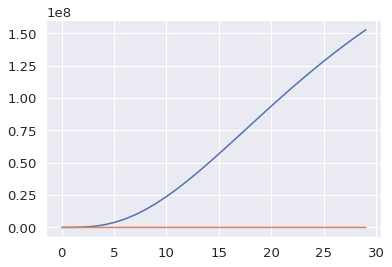

In [32]:
plt.plot(arange(0,30,1), F.dmdt_integrate(float(m0_temp), R0, 30, temp_params))

In [33]:
temp_params

{'alpha': 10,
 'epsilon': 0.7,
 'norm_const': 9.694238137452219,
 'meta_prop': 0.25,
 'meta_exp': 0.9,
 'c': 0.1,
 'rho': 0.2,
 'Xr': 1,
 'amp': 0,
 'period': 365,
 'dimensionality': '3D'}

/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


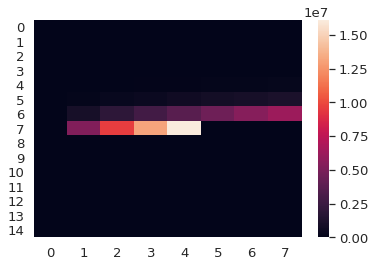

In [34]:
sb.heatmap(F.reproduction_array(c_vec, rho_vec, m0, R0, time, temp_params))

In [35]:
mass[10]

23868176.503677677

In [36]:
mass[-1]

254911446.69484293

## Metabolic Exponent

In [74]:
temp_params = copy.deepcopy(params)
time = 3000
temp_params["alpha"] = 365*5
temp_params

{'alpha': 1825,
 'epsilon': 0.7,
 'norm_const': 9.694238137452219,
 'meta_prop': 0.1,
 'meta_exp': 1,
 'c': 0.1,
 'rho': 0,
 'Xr': 1,
 'amp': 0.5,
 'period': 365,
 'dimensionality': '2D'}

/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/do

/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:215: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:240: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/do

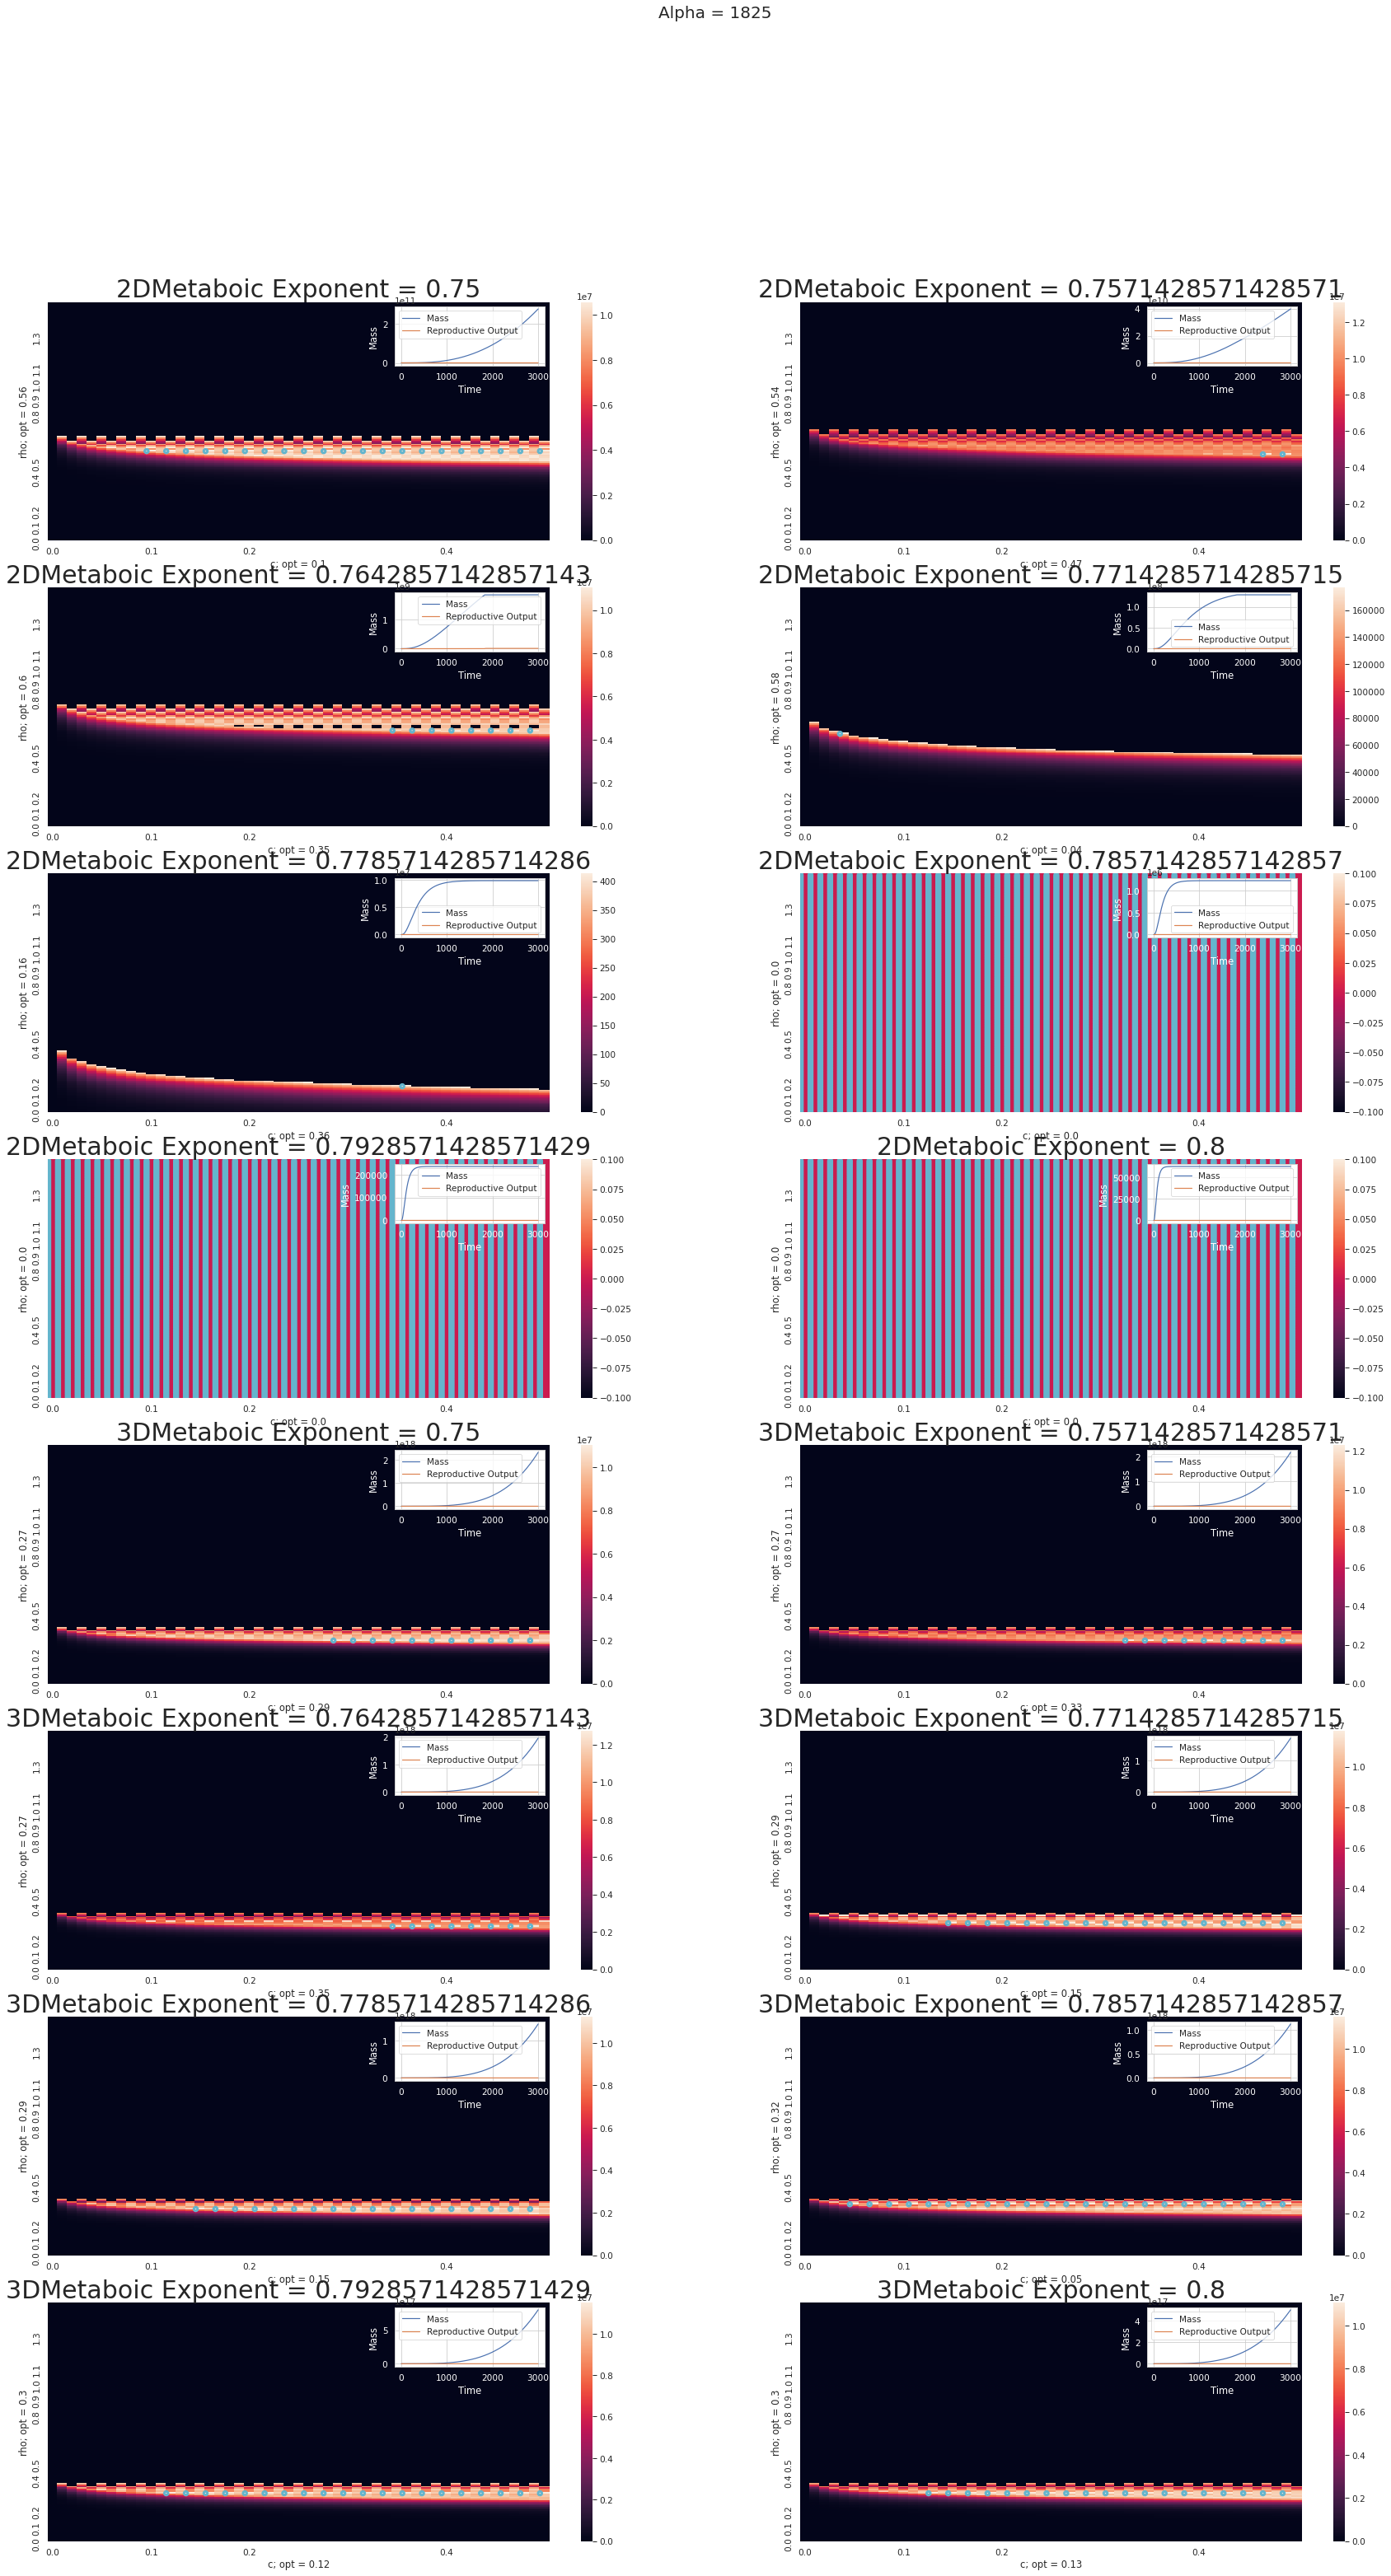

In [75]:
exponents = linspace(0.75, 0.8, 8)
dimensions = ["2D", "3D"]

# c, rho vectors
resolution = 0.01 # resolution of parameter scan
c_vec = around(arange(0, 0.5+resolution, resolution), decimals=3)
rho_vec = around(arange(0, 1.5, resolution), decimals=3)

rho2D = []
c2D = []
rho3D = []
c3D = []

ticker = 0
plt.figure(figsize=(30,50))
plt.suptitle("Alpha = " + str(temp_params["alpha"]), fontsize=20)
for dim in dimensions:
    for meta_exp in exponents:
        ticker= ticker +1
        temp_params["dimensionality"] = dim
        temp_params["meta_exp"] = meta_exp
        #change norm_const for dim
        if dim == "2D":
            temp_params["norm_const"] = norm_const_2D
        else:
            temp_params["norm_const"] = norm_const_3D
        #plot
        ax = plt.subplot(len(exponents), 2, ticker)
        c, rho = F.plot_optimum(c_vec, rho_vec, m0, R0, time, temp_params)

        plt.title(dim + "Metaboic Exponent = " + str(meta_exp), fontsize=30)

    # subsub-plots in top right
        if len(c) == 1:
            c = float(c)
            rho = float(rho)
            plt.xlabel("c; opt = " + str(c))
            plt.ylabel("rho; opt = " + str(rho))
            
        else:
            c= c[0]
            rho= rho[0]
            plt.xlabel("c; opt = " + str(c))
            plt.ylabel("rho; opt = " + str(rho))
        # record c and rho for seperate growth plots 
        if dim == "2D":
            c2D.append(c)
            rho2D.append(rho)
        else:
            c3D.append(c)
            rho3D.append(rho)

        growth_plot = inset_axes(ax, width="30%", height=1, loc="upper right")
        temp_params["c"] = c
        temp_params["rho"] = rho
        F.plot_supply(m0, R0, time, temp_params)
        plt.xticks(color="w")
        plt.xlabel("Time", color="w")
        plt.yticks(color="w")
        plt.ylabel("Mass", color="w")
plt.savefig("../results/meta_exp_3D2D.pdf")

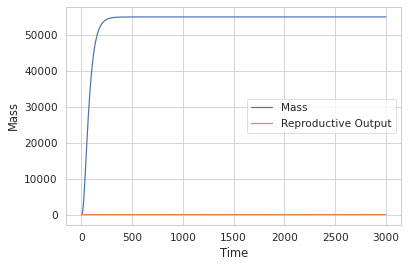

In [76]:
## testing jaggies
temp_params = copy.deepcopy(params)
temp_params["meta_exp"] = 0.8
temp_params["c"] = 0.2
temp_params["rho"] = 0.4
F.plot_supply(m0, R0, time, temp_params)
None

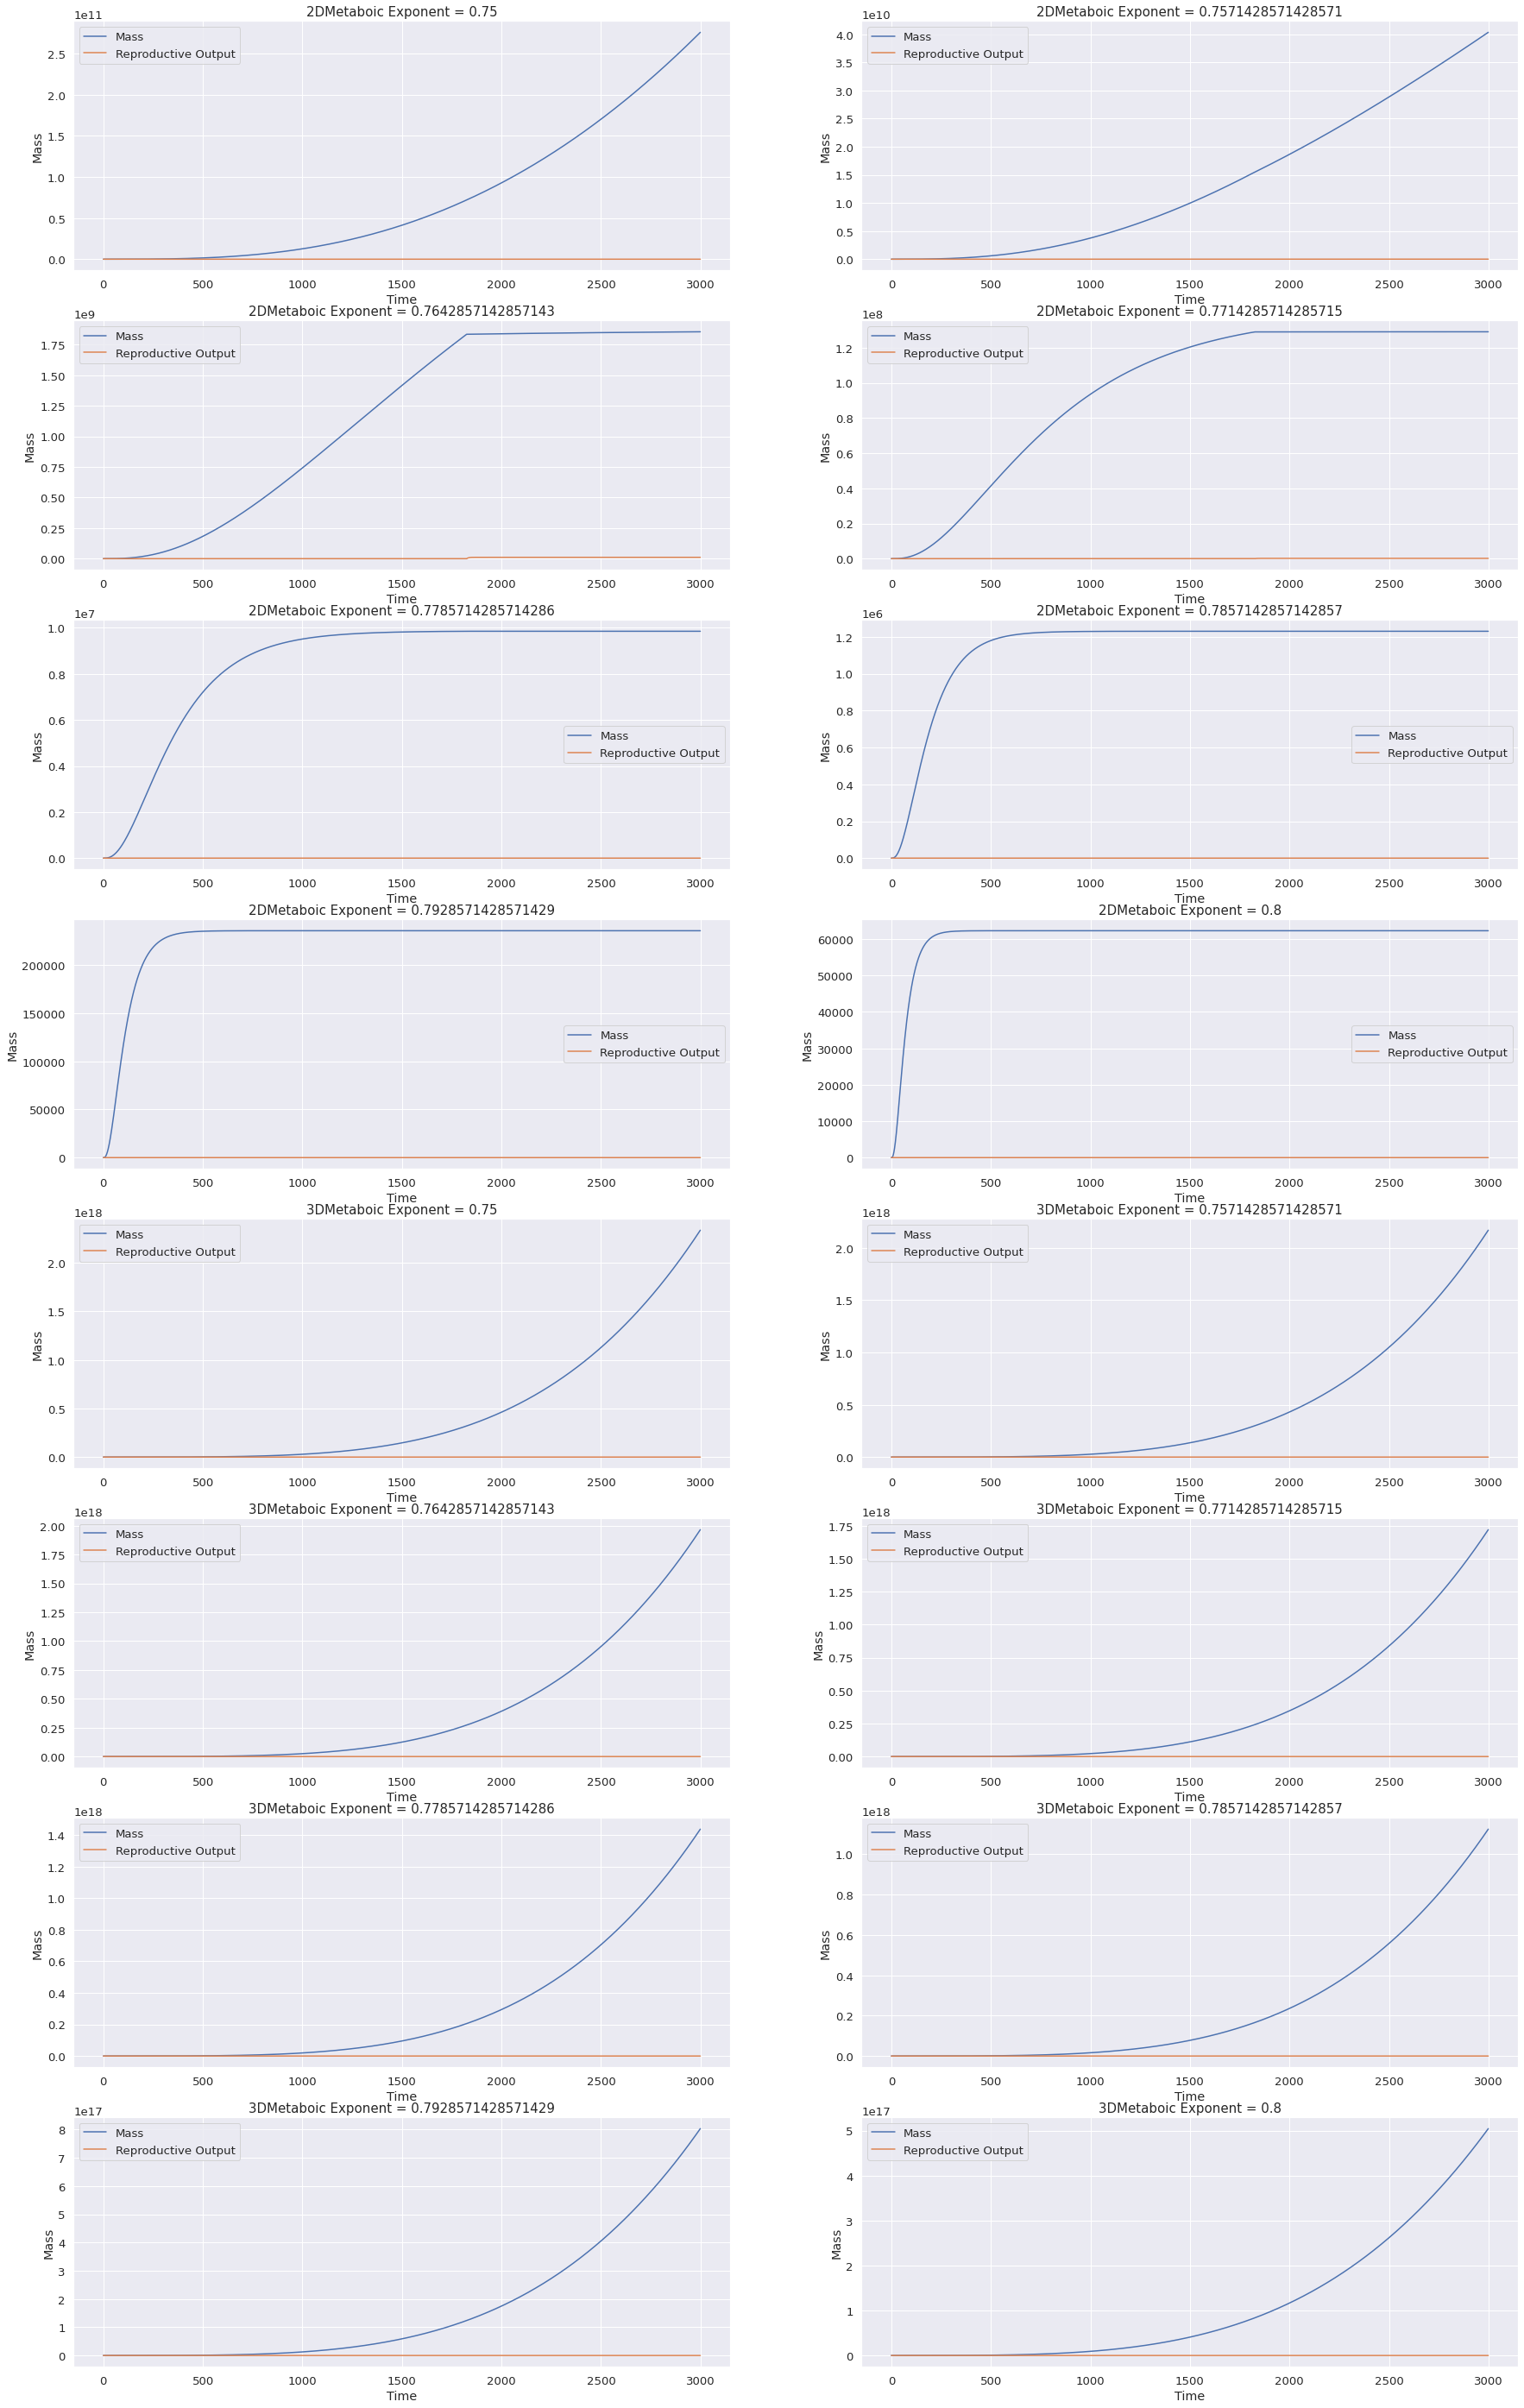

In [39]:
ticker = 0
fig = plt.figure(figsize=(30,50))
for dim in dimensions:
    for i, meta_exp in enumerate(exponents):
        ticker= ticker +1

        temp_params["dimensionality"] = dim
        temp_params["meta_exp"] = meta_exp
        
        #change norm_const for dim
        if dim == "2D":
            temp_params["norm_const"] = norm_const_2D
        else:
            temp_params["norm_const"] = norm_const_3D
            
        ax = plt.subplot(len(exponents), 2, ticker)
        if dim == "2D":
            c = c2D[i]
            rho = rho2D[i]
        else:
            c = c3D[i]
            rho = rho3D[i]  
            
        temp_params["c"] = c
        temp_params["rho"] = rho
        
        F.plot_supply(m0, R0, time, temp_params)

        plt.title(dim + "Metaboic Exponent = " + str(meta_exp), fontsize=15)

plt.savefig("../results/2D3D_meta_exp_growth_curves.pdf")

In [40]:
# reset time
time = 1000

## Maturation Time

In [41]:
# parameter reset
temp_params = copy.deepcopy(params)
temp_params

{'alpha': 10,
 'epsilon': 0.7,
 'norm_const': 9.694238137452219,
 'meta_prop': 0.25,
 'meta_exp': 0.9,
 'c': 0.1,
 'rho': 0.2,
 'Xr': 1,
 'amp': 0,
 'period': 365,
 'dimensionality': '2D'}

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/.local/lib/python3.8/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/do

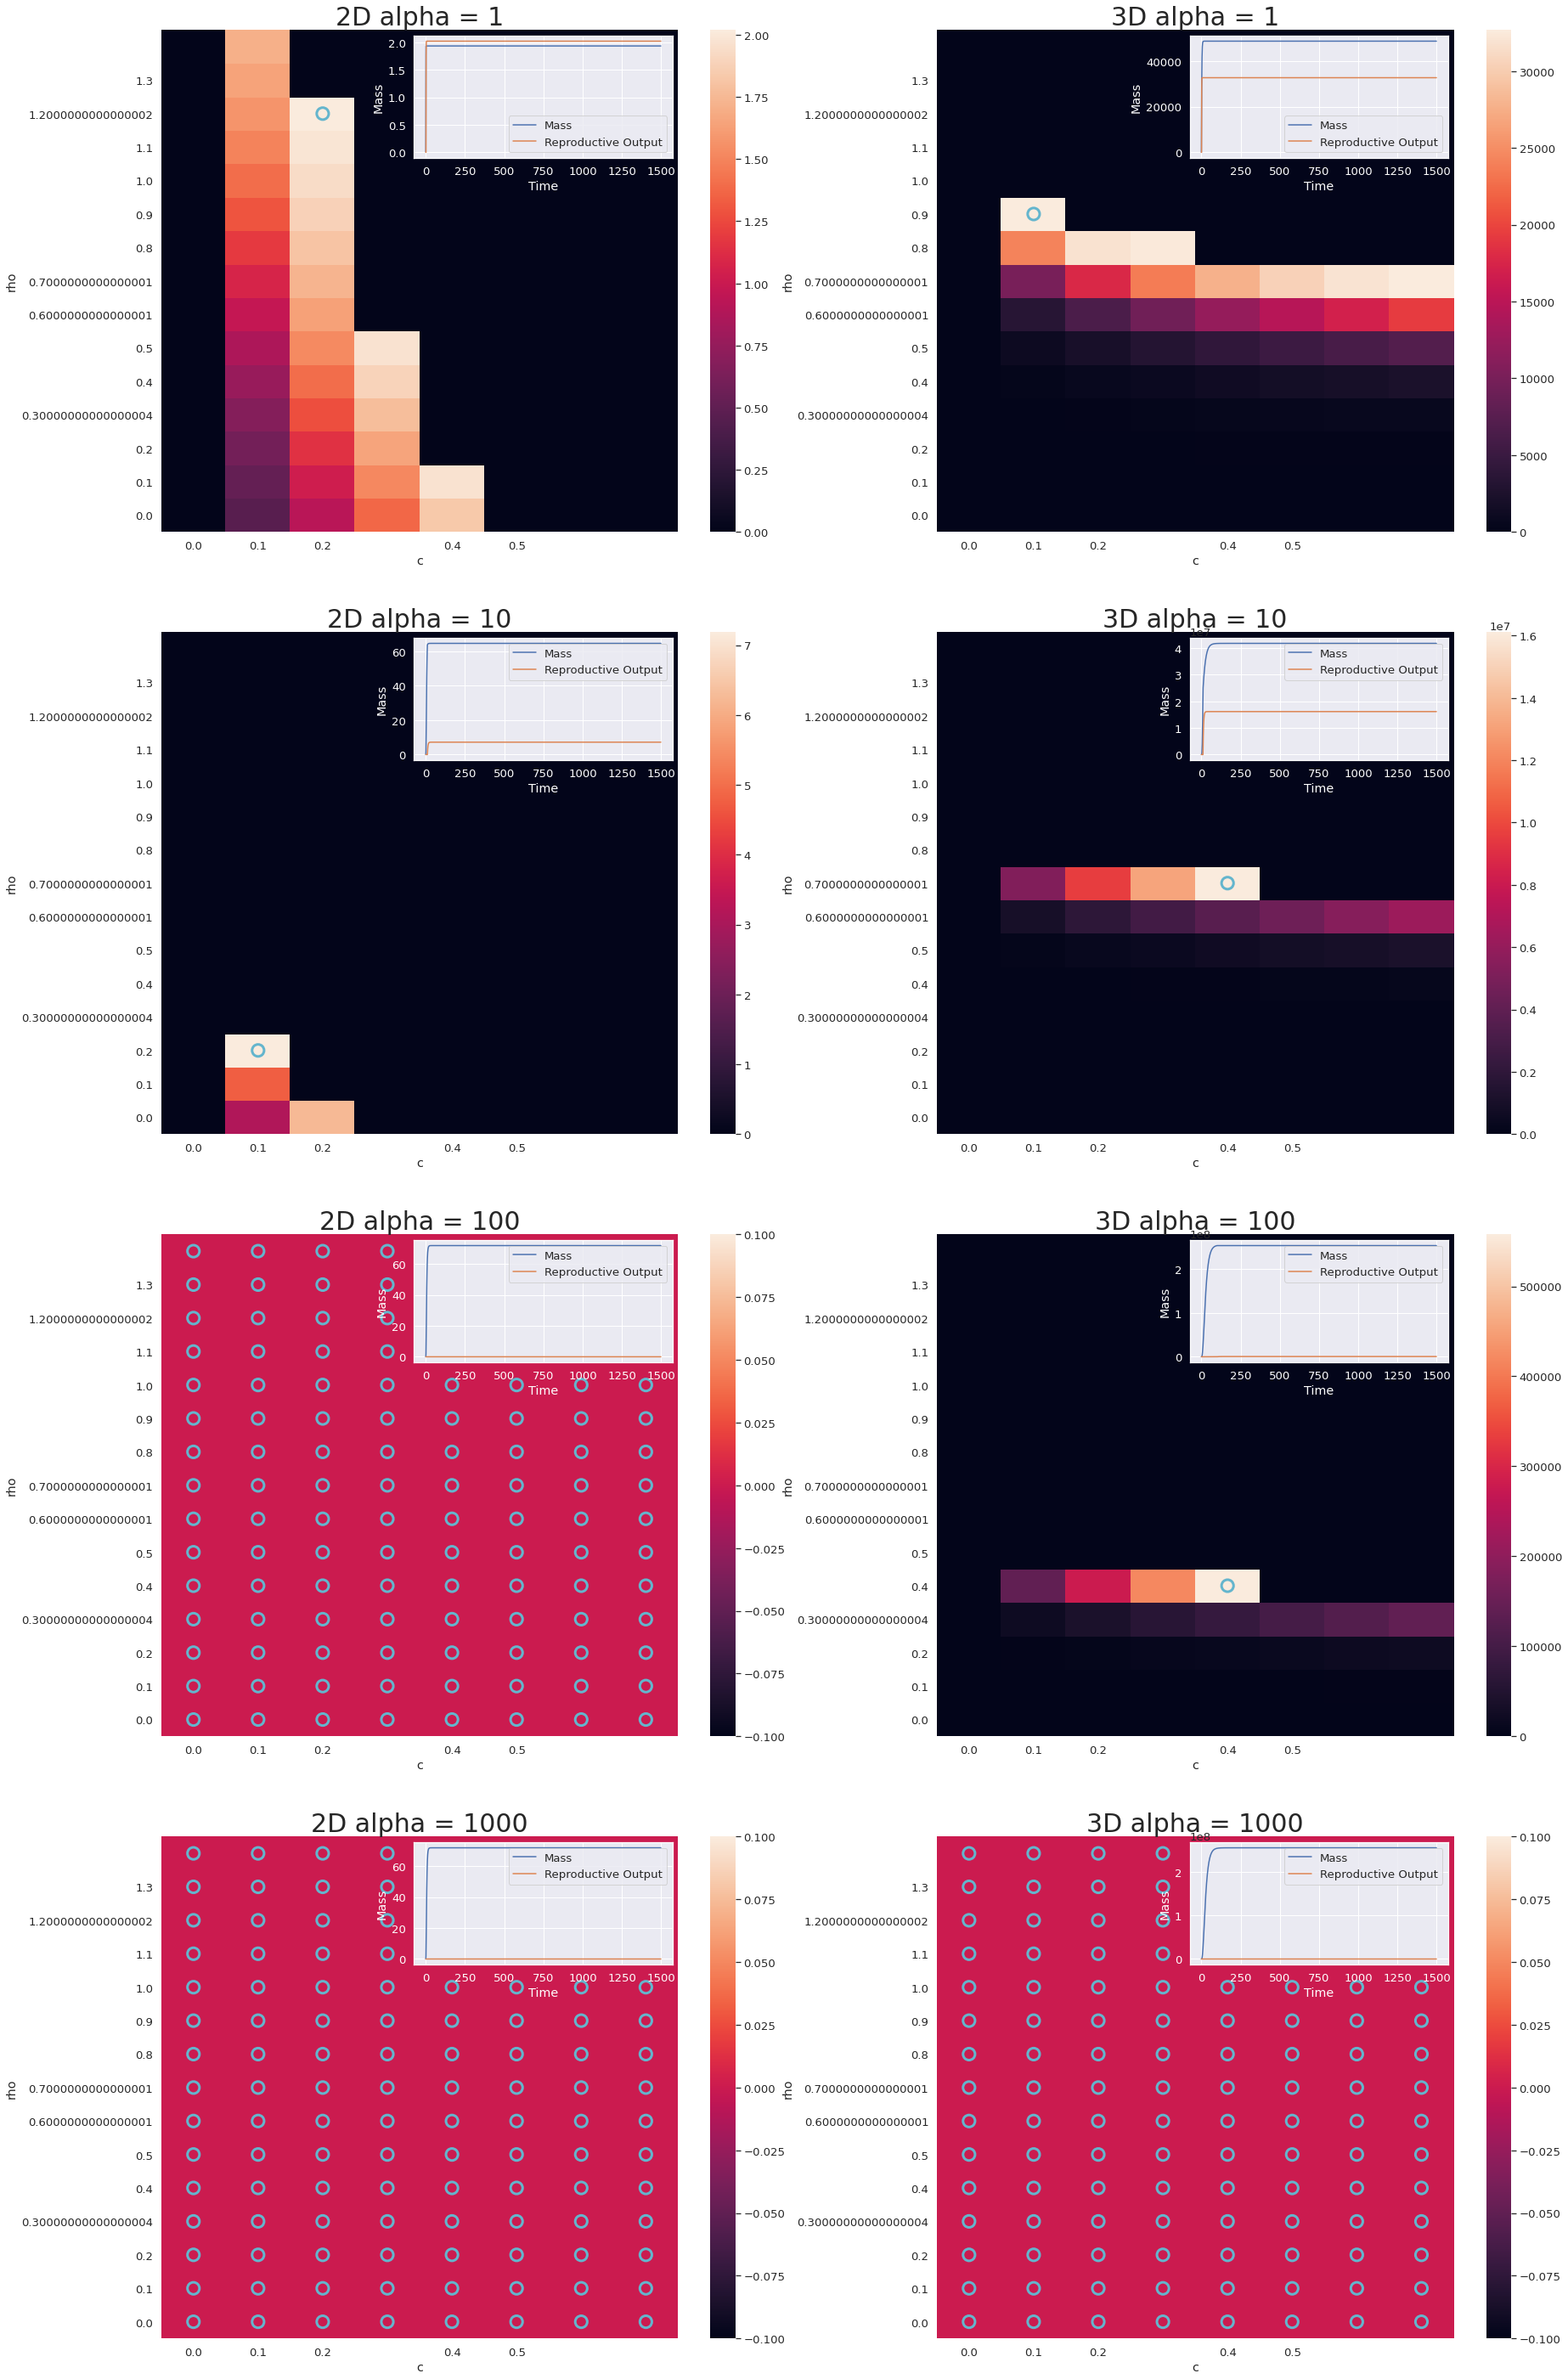

In [42]:
time = 1500
# 
alphas = [1, 10, 100, 1000]

# c, rho vectors
resolution = 0.1 # resolution of parameter scan
c_vec = arange(0, 0.7+resolution, resolution)
rho_vec = arange(0, 1.5, resolution)

# store rho and c results
dict_2D ={}
dict_3D ={}

dimensions = ["2D", "3D"]
ticker = 0
plt.figure(figsize=(30,50))
for alpha_temp in alphas:
    temp_params["alpha"] = alpha_temp
    for dim in dimensions:
        ticker= ticker +1
        temp_params["dimensionality"] = dim
        #change norm_const for dim
        if dim == "2D":
            temp_params["norm_const"] = norm_const_2D
        else:
            temp_params["norm_const"] = norm_const_3D
        #plot
        ax = plt.subplot(len(alphas), 2, ticker)
        c, rho = F.plot_optimum(c_vec, rho_vec, m0, R0, time, temp_params)
        if dim == "2D":
            dict_2D[str(alpha_temp)] = [c, rho]
        else:
            dict_3D[str(alpha_temp)] = [c, rho]
        plt.title(dim + " alpha = " + str(alpha_temp), fontsize=30)
        
    # subsub-plots in top right
        if len(c) == 1:
            c = float(c)
            rho = float(rho)
        else:
            c=0
            rho=0

        growth_plot = inset_axes(ax, width="50%", height=2, loc="upper right")
        temp_params["c"] = c
        temp_params["rho"] = rho
        F.plot_supply(m0, R0, time, temp_params)
        plt.xticks(color="w")
        plt.xlabel("Time", color="w")
        plt.yticks(color="w")
        plt.ylabel("Mass", color="w")
plt.savefig("../results/alphas_3D2D.pdf")

time =100

# Varying Starting Mass

In [43]:
# make temp copy of params so params isn't changed, ie reset params for section
temp_params = copy.deepcopy(params)

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scal

/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scalars
  return Q * c * (m**rho) * exp(-(k+Z)*(t-alpha))
/home/donal/Documents/Project/code/Functions.py:220: RuntimeWarning: invalid value encountered in double_scalars
  return (m**gamma) * a0
/home/donal/Documents/Project/code/Functions.py:245: RuntimeWarning: invalid value encountered in double_scalars
  return (m**-beta) * th0
/home/donal/Documents/Project/code/Functions.py:384: RuntimeWarning: invalid value encountered in double_scalars
  B_m= 0.14 * m**(meta_exp) # J/s
/home/donal/Documents/Project/code/Functions.py:429: RuntimeWarning: invalid value encountered in double_scalars
  R = c * norm_const * (m**rho) # kg/d
/home/donal/Documents/Project/code/Functions.py:365: RuntimeWarning: invalid value encountered in double_scal

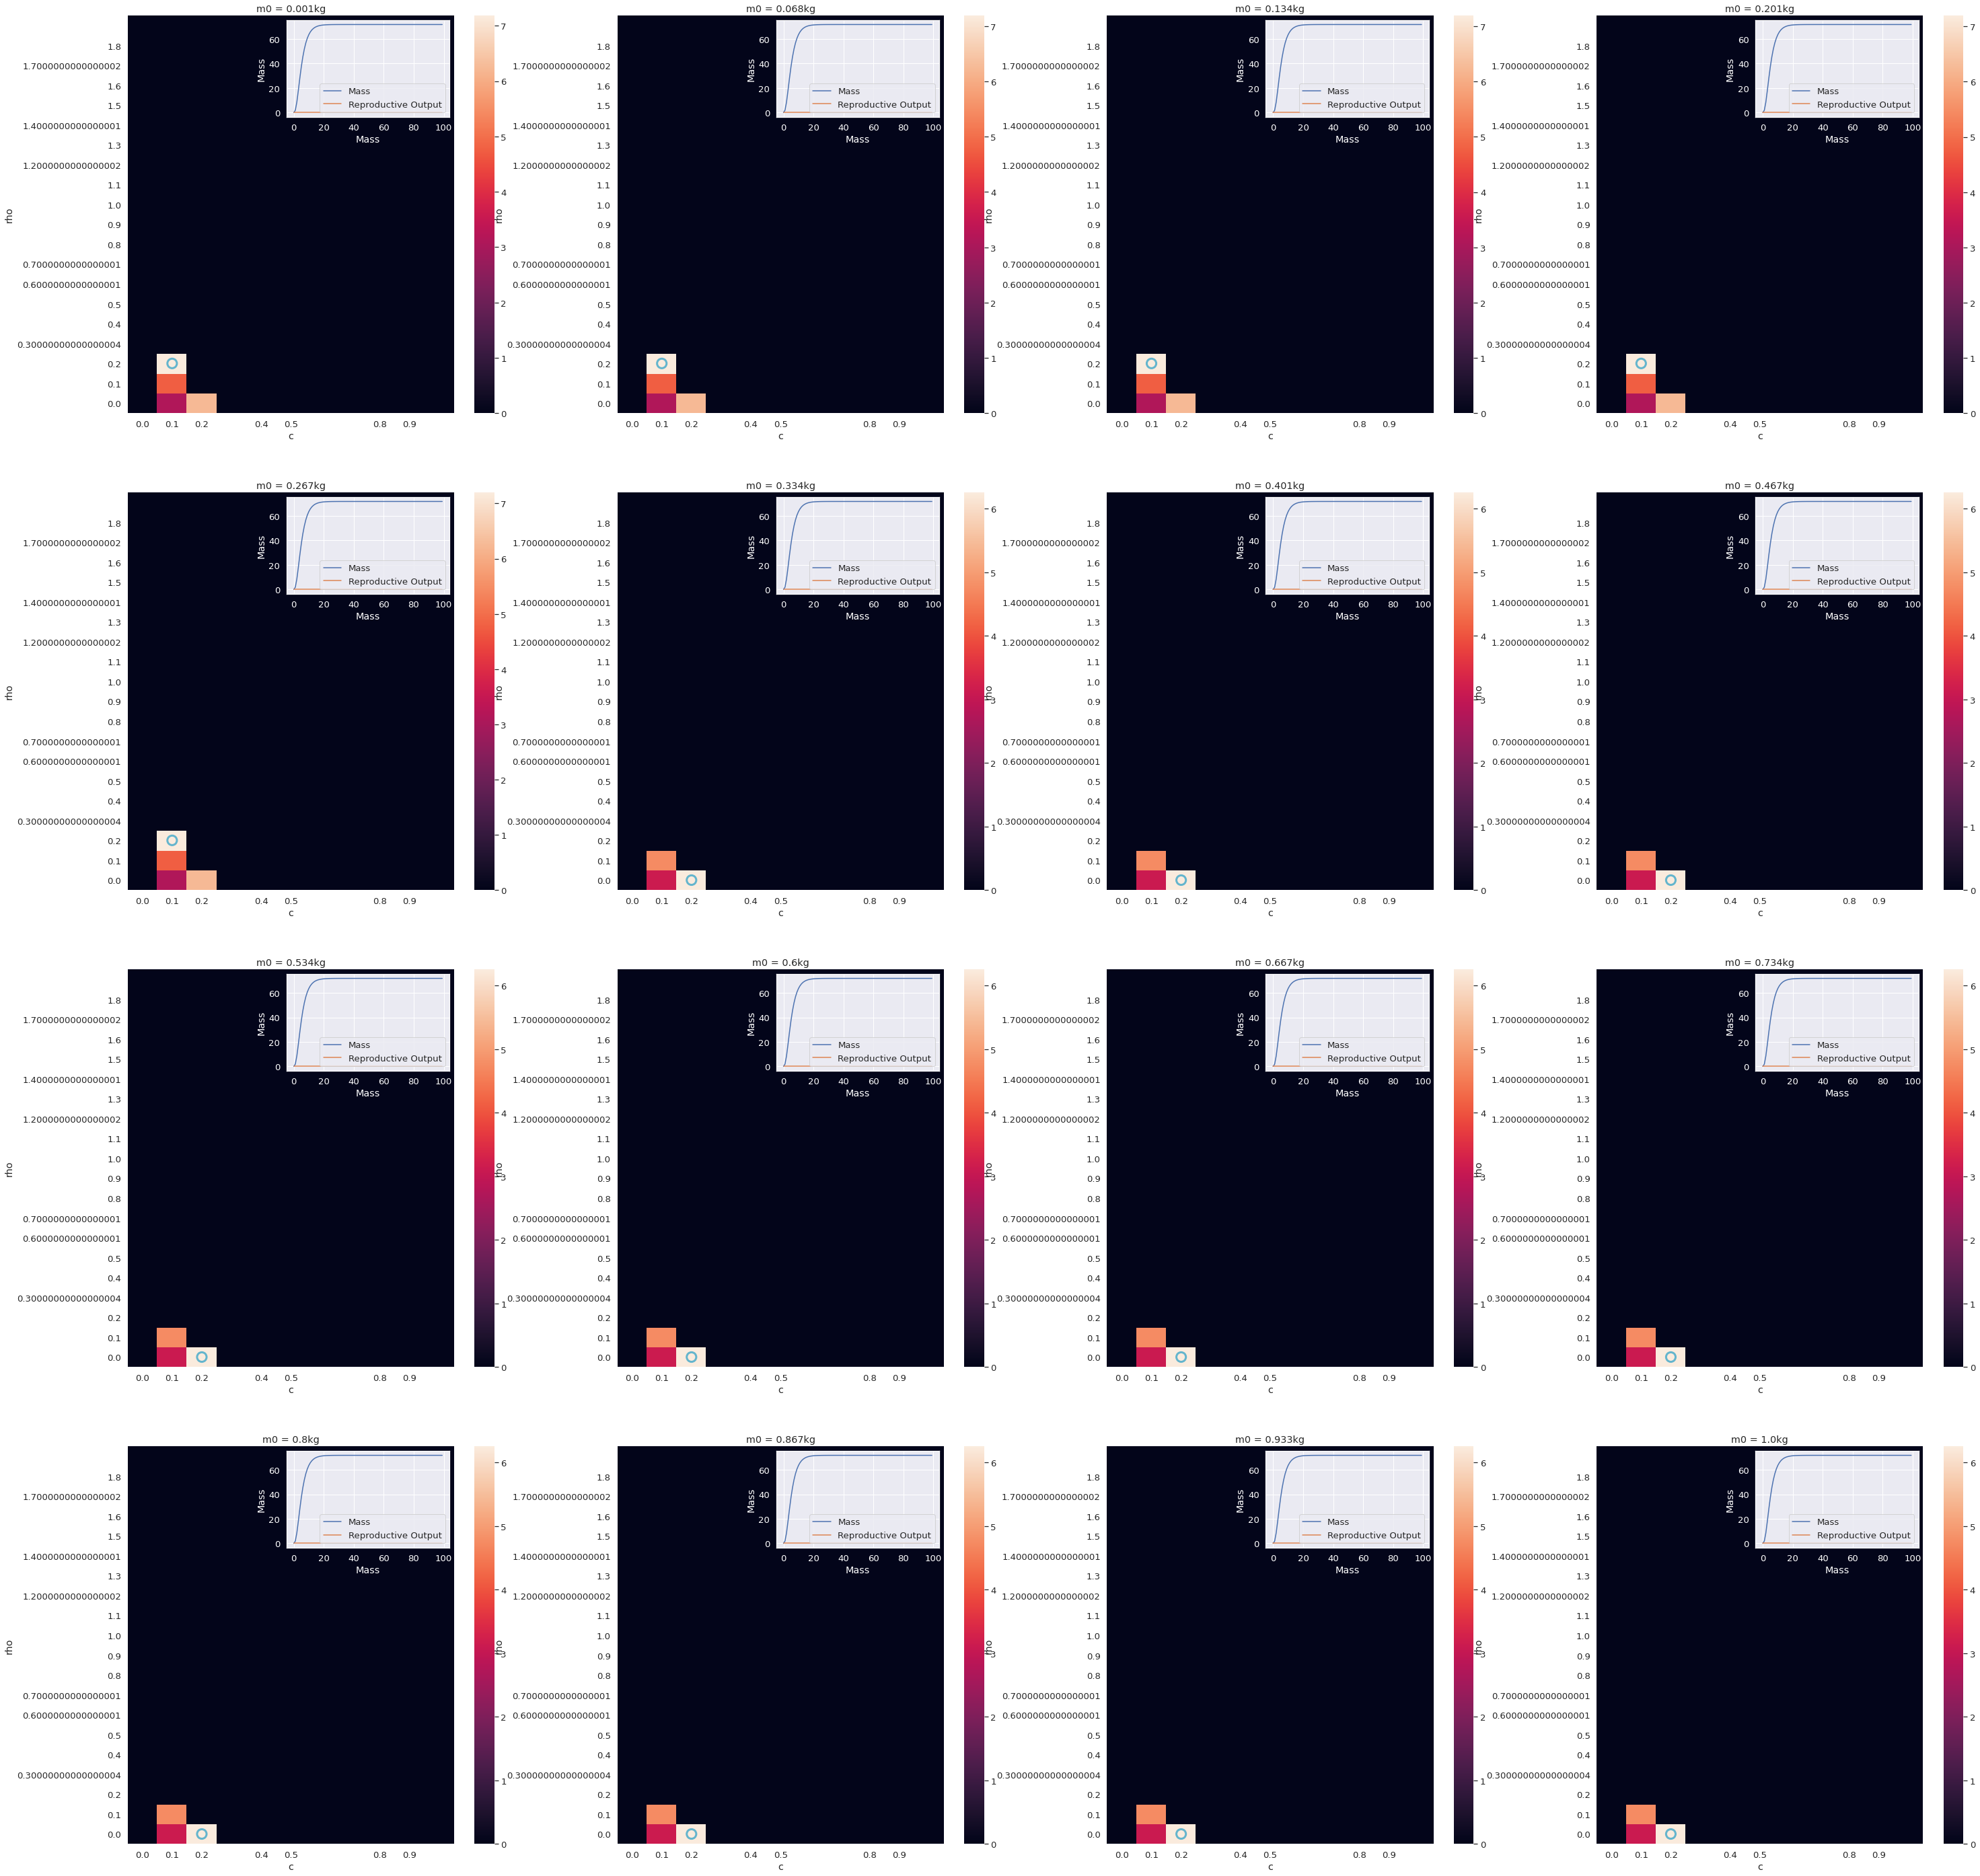

In [44]:
masses = around(linspace(10**-3, 1, 16), decimals=3)

# c, rho vectors
resolution = 0.1 # resolution of parameter scan
c_vec = arange(0, 1+resolution, resolution)
rho_vec = arange(0, 2, resolution)

plt.figure(figsize=(50,50))
for i, m0_temp in enumerate(masses,1):
    ax = plt.subplot(4, 4, i)
    F.plot_optimum(c_vec, rho_vec, m0_temp, R0, time, temp_params)
    plt.title("m0 = " + str(m0_temp) + "kg")
    
    
    growth_plot = inset_axes(ax, width="50%", height=2, loc="upper right")
    temp_params["c"] = c
    temp_params["rho"] = rho
    F.plot_supply(m0, R0, time, temp_params)
    plt.xticks(color="w")
    plt.xlabel("Mass", color="w")
    plt.yticks(color="w")
    plt.ylabel("Mass", color="w")
plt.savefig("../results/changing_m0_heatmap.pdf")

In [45]:
# break

# sanity check
- A methodology check for last year's results as done by [Luke Vassor](https://github.com/lvassor/HyperallometricFecundity) to see if I can replicate his results.

In [46]:
from scipy.integrate import odeint
from numpy import exp, arange, linspace, around, zeros, zeros_like, array, isnan
import matplotlib.pyplot as plt
import seaborn as sb
import Functions as F
sb.set(style="whitegrid")

In [47]:
def dmdt(mR0, t, a, gamma, b, c, rho, alpha, M, Z, k):
    m, R0 = mR0
    intake = a * m ** gamma
    maint = b * m
    
    if t < alpha:
        repro = 0
    else:
        repro = c * m**rho
    
    dm_dt = intake - maint - repro
    output = repro * exp(-(k + Z)*(t-alpha))
    return array([dm_dt, output])
    

In [48]:
# starting parameters
m0 = 0.1
M = 15000
R0 = 0
a = 2.15
gamma = 0.75
b = a/(M**0.25)
c = 0.001
alpha = 200
k = 0.01
t = arange(0, 10**4, 1)
Z = 2/alpha

mR0 = [m0, R0]

In [49]:
resolution = 0.05
c_vec = around(arange(0.001, 0.5, resolution), decimals=2)
rho_vec = around(arange(0.001, 1.25, resolution), decimals=2)
results_array = zeros((len(rho_vec), len(c_vec)))

In [50]:
for i, rho in enumerate(rho_vec):
    for j, c in enumerate(c_vec):
        params = (a, gamma, b, c, rho, alpha, M, Z, k)
        result = odeint(dmdt, mR0, t, args=params)
        mass = result[:,0]
        repro = result[:,1]
        
        if mass[-1] < mass[alpha] or isnan(mass[-1]):# or mass[0] > mass[-1]:
#             mass = zeros_like(mass)
            repro = zeros_like(repro)
        
        results_array[i,j] = repro[-1]
    

<ipython-input-47-8a410c23ec88>:3: RuntimeWarning: invalid value encountered in double_scalars
  intake = a * m ** gamma
<ipython-input-47-8a410c23ec88>:9: RuntimeWarning: invalid value encountered in double_scalars
  repro = c * m**rho


In [51]:
max_ind = F.find_max(results_array)
i, j = max_ind
rho_opt = rho_vec[i]
c_opt = c_vec[j]
print("c_opt = ", c_opt, "rho opt = ", rho_opt)

c_opt =  [0.1] rho opt =  [0.05]


Text(0.5, 201.5, 'c')

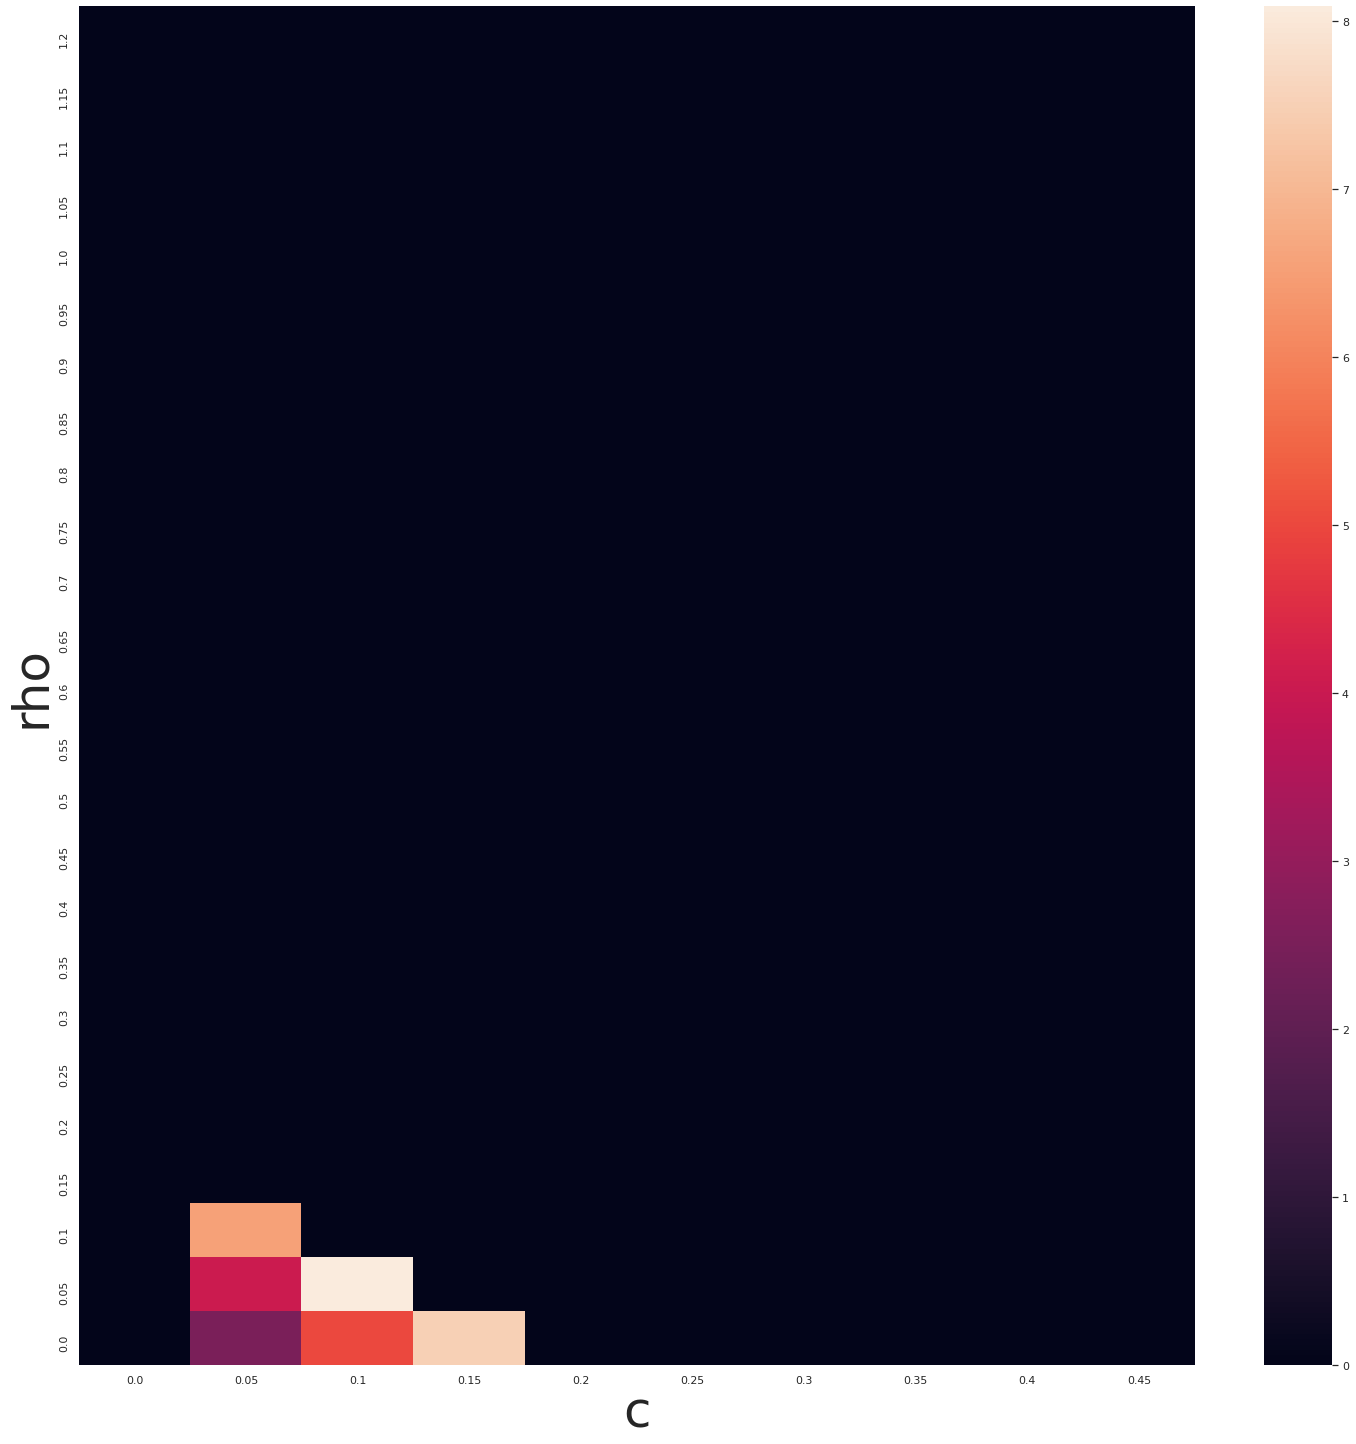

In [52]:
plt.figure(figsize=(25,25))
sb.heatmap(results_array,
            xticklabels = around(c_vec, decimals=2), 
            yticklabels= around(rho_vec, decimals=2)).invert_yaxis()
plt.ylabel("rho", fontsize=50)
plt.xlabel("c", fontsize=50)

# Sandbox

In [53]:
from numpy import isnan, nan_to_num, zeros_like, zeros, array, arange, meshgrid, around, nan
from numpy import where, amax
import seaborn as sb
import matplotlib.pyplot as plt
import Functions as F

## for graphs in my darkmode
sb.set(context='paper',style='whitegrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

array([[1.00000000e-01, 0.00000000e+00],
       [2.96666699e+00, 0.00000000e+00],
       [7.40821476e+00, 0.00000000e+00],
       [1.05653916e+01, 6.15170946e-09],
       [1.15910837e+01, 6.74099122e-01],
       [1.21146911e+01, 9.84141985e-01],
       [1.23742707e+01, 1.12674203e+00],
       [1.25011765e+01, 1.19232901e+00],
       [1.25628063e+01, 1.22249487e+00],
       [1.25926398e+01, 1.23636925e+00],
       [1.26070591e+01, 1.24275058e+00],
       [1.26140232e+01, 1.24568559e+00],
       [1.26173854e+01, 1.24703552e+00],
       [1.26190083e+01, 1.24765640e+00],
       [1.26197917e+01, 1.24794196e+00],
       [1.26201698e+01, 1.24807330e+00],
       [1.26203522e+01, 1.24813371e+00],
       [1.26204403e+01, 1.24816150e+00],
       [1.26204828e+01, 1.24817428e+00],
       [1.26205033e+01, 1.24818015e+00],
       [1.26205132e+01, 1.24818286e+00],
       [1.26205180e+01, 1.24818410e+00],
       [1.26205203e+01, 1.24818467e+00],
       [1.26205214e+01, 1.24818493e+00],
       [1.262052

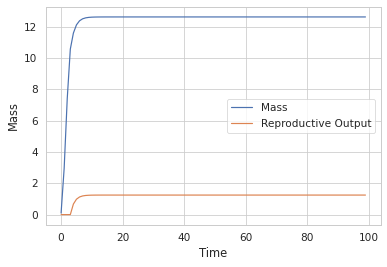

In [54]:

params = {"alpha" : 3, "epsilon" : 0.7, # epsilon from peters book
          "norm_const" : norm_const, "meta_prop" : 0.1, "meta_exp" : 1,
          "c" : 0.1, "rho" : 0,
          "Xr" : 1, "amp" : 0.5, "period" : 365, "dimensionality" : "2D"}
# Parameters
m0 = 0.1
R0 = 0
time = 100

F.plot_supply(m0, R0, time, params)


Text(0.5, 0, 'time')

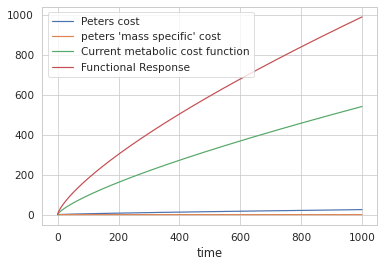

In [55]:
amount = 10**3
t = arange(0,amount, 1)
mass = arange(0.1, amount, 1)
peters = 0.14*mass**0.751
peters_specific = 0.14*mass**-0.249
plt.plot(t, peters, label="Peters cost")
plt.plot(t, peters_specific, label = "peters 'mass specific' cost")
plt.plot(t, F.metabolic_cost(mass), label="Current metabolic cost function")
plt.plot(params["epsilon"] * F.Fun_Resp(mass, Xr=params["Xr"], dimensionality="2D")*24*60*60, 
         label="Functional Response")
plt.legend()
plt.xlabel("time")

# Log Plots
to look at how some of the rates such as gain and metabolic cost scale with eachother

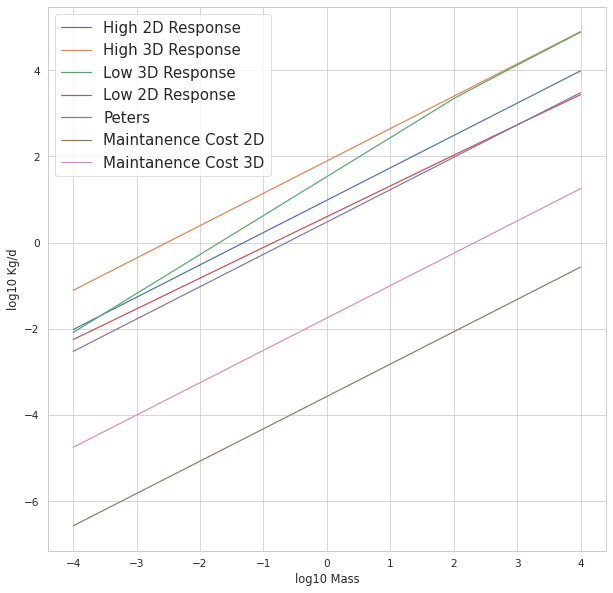

In [56]:
from numpy import log10
masses = linspace(10**-4, 10**4, 10**2)
log_masses =log10(masses)
sec_to_day = 60*60*24

norm_const_2D = F.Fun_Resp(1, 10**6, "2D")*sec_to_day
norm_const_3D = F.Fun_Resp(1, 10**6, "3D")*sec_to_day
# Functional responses
high_res_3D_func_resp = log10(F.Fun_Resp(masses, 10**6, "3D")*sec_to_day)
high_res_2D_func_resp = log10(F.Fun_Resp(masses, 10**6, "2D")*sec_to_day)
low_res_3D_func_resp = log10(F.Fun_Resp(masses, 10**-1, "3D")*sec_to_day)
low_res_2D_func_resp = log10(F.Fun_Resp(masses, 10**-1, "2D")*sec_to_day)

# metabolic cost from peters
peters = log10(F.metabolic_cost(m=masses, meta_exp=0.75))
maint_cost_2D = log10(0.25* norm_const_2D*F.Fun_Resp(masses, 10**6, dimensionality="2D")**1)
maint_cost_3D = log10(0.25* norm_const_3D*F.Fun_Resp(masses, 10**6, dimensionality="3D")**1)

fig = plt.figure(figsize=(10,10))
plt.plot(log_masses, high_res_2D_func_resp, label = "High 2D Response")
plt.plot(log_masses, high_res_3D_func_resp, label = "High 3D Response")
plt.plot(log_masses, low_res_3D_func_resp, label = "Low 3D Response")
plt.plot(log_masses, low_res_2D_func_resp, label = "Low 2D Response")

plt.plot(log_masses, peters, label= "Peters")
plt.plot(log_masses, maint_cost_2D, label = "Maintanence Cost 2D")
plt.plot(log_masses, maint_cost_3D, label = "Maintanence Cost 3D")

# plt.plot(log_masses, )
plt.xlabel("log10 Mass")
plt.ylabel("log10 Kg/d")
plt.legend(fontsize = 15)


## barneche vs peters

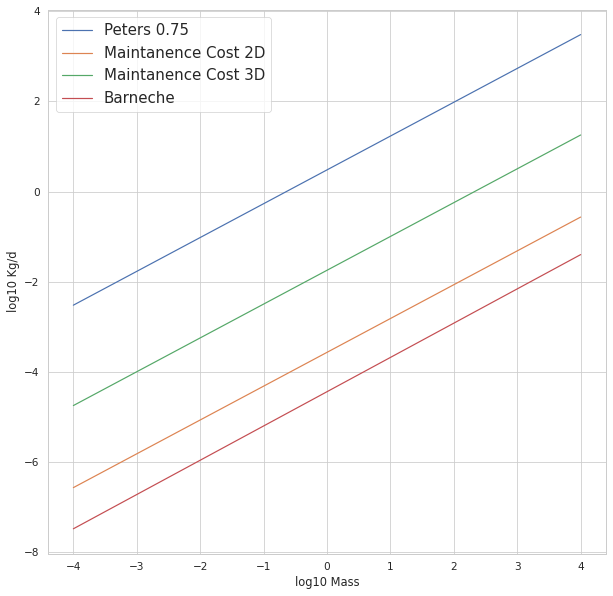

In [57]:
def barneche2014(m):
    """
    routine metabolic rate from barneche et al 2014.
    outputs in g C /d
    """
    # routine rate
    alpha = 0.76
    intercept = exp(-5.71)
    return intercept * (m**alpha)

def peters_2(m, alpha = -0.249):
    return 0.14 * (m**alpha)  

peters2 = log10(peters_2(masses))
barneche = log10(barneche2014(masses) *11/1000) # g C /d -> kg wetmass /d
fig = plt.figure(figsize=(10,10))
plt.plot(log_masses, peters, label= "Peters 0.75")
# plt.plot(log_masses, peters2, label= "Peters -0.25")
plt.plot(log_masses, maint_cost_2D, label = "Maintanence Cost 2D")
plt.plot(log_masses, maint_cost_3D, label = "Maintanence Cost 3D")
plt.plot(log_masses, barneche, label= "Barneche")
plt.xlabel("log10 Mass")
plt.ylabel("log10 Kg/d")
plt.legend(fontsize = 15)

In [58]:
F.metabolic_cost

<function Functions.metabolic_cost(m, meta_exp=0.751)>

# 3D plots

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [28]:
x = np.linspace(-4,4, 1000)
y = np.linspace(-4,4, 1000)#np.random.normal(size=1000)
z =  np.random.normal(size=1000)

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)

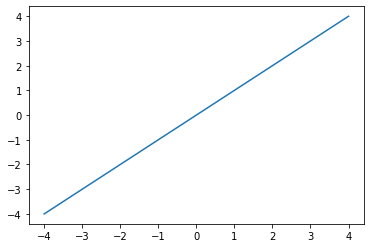

In [29]:
fig=plt.figure()
# ax = fig.gca(projection="3d")

plt.plot(x,y)
linregress(x,y)

In [30]:
linregress(x,y)[2]

1.0

In [84]:
key ="re"
dim= "2D"
temp_params["dimensionality"]  =dim
with open(f"../results/sensitivity{key}{dim}"):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-84-e4d7b36c9a39>, line 4)